### Data Analytics

#### Edmundo Fernandes

I will try to resolve if I can predict the number of hospital days (if any) a person may require if they have had the Covid 19 vaccine, report an adverse effect and require hospitalisation. This is important as the lockdowns occurred because of the impact on the hospital system in each country. This will make this a regression problem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time, datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, f1_score, confusion_matrix, accuracy_score,mean_squared_error
from sklearn.metrics import precision_score, recall_score
from sklearn import ensemble, linear_model, neighbors, svm, tree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from numpy import sqrt
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import category_encoders as ce
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [2]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--",'nan','!','?']
df = pd.read_csv('vaers_jan_nov_2021.csv', na_values=missing_value_formats, engine='python')
df = df.loc[df['STATE'] == 'CA'].reset_index(drop=True)

In [3]:
df

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916601,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy"""
1,916612,Ear pain,24.0,Hypoaesthesia,24.0,NaN,NaN,NaN,NaN,NaN,...,none,Graves Disease,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,"penicillin, toradol, methimazole"
2,916613,Abdominal pain upper,23.1,Dizziness,23.1,Dysgeusia,23.1,NaN,NaN,NaN,...,None,None,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,None
3,916617,Chills,23.1,Dizziness,23.1,Injection site pain,23.1,Myalgia,23.1,Pyrexia,...,NaN,Depression,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,None
4,916621,Chills,23.1,Fatigue,23.1,Headache,23.1,Myalgia,23.1,NaN,...,None,None.,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,Ceftiaxone (Rocephin)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86376,1845783,Extra dose administered,24.1,Incorrect dose administered,24.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,11/05/2021,NaN,NaN,NaN,NaN
86377,1845788,Extra dose administered,24.1,No adverse event,24.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,11/05/2021,NaN,NaN,NaN,NaN
86378,1845795,No adverse event,24.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,11/05/2021,NaN,NaN,NaN,NaN
86379,1845797,Swelling of eyelid,24.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,11/05/2021,NaN,NaN,NaN,NaN


In [4]:
df.columns


Index(['VAERS_ID', 'SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2',
       'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4',
       'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5', 'VAX_TYPE',
       'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE',
       'VAX_NAME', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES'],
      dtype='object')

In [5]:
df.shape

(86381, 52)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86381 entries, 0 to 86380
Data columns (total 52 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VAERS_ID         86381 non-null  int64  
 1   SYMPTOM1         86381 non-null  object 
 2   SYMPTOMVERSION1  86381 non-null  float64
 3   SYMPTOM2         68469 non-null  object 
 4   SYMPTOMVERSION2  68469 non-null  float64
 5   SYMPTOM3         53482 non-null  object 
 6   SYMPTOMVERSION3  53482 non-null  float64
 7   SYMPTOM4         40583 non-null  object 
 8   SYMPTOMVERSION4  40583 non-null  float64
 9   SYMPTOM5         30533 non-null  object 
 10  SYMPTOMVERSION5  30533 non-null  float64
 11  VAX_TYPE         86381 non-null  object 
 12  VAX_MANU         86381 non-null  object 
 13  VAX_LOT          64008 non-null  object 
 14  VAX_DOSE_SERIES  85866 non-null  object 
 15  VAX_ROUTE        70218 non-null  object 
 16  VAX_SITE         69125 non-null  object 
 17  VAX_NAME    

In [7]:
percentage_missing = (round(df.isnull().  sum() * 100/ len(df),2).sort_values(ascending=False))
display(pd.DataFrame({'Missing Percentage' :percentage_missing}));

,Missing Percentage
ER_VISIT,100.00
RPT_DATE,99.99
V_FUNDBY,99.98
X_STAY,99.94
BIRTH_DEFECT,99.89
CAGE_MO,99.83
DATEDIED,99.04
DIED,98.94
L_THREAT,97.44
DISABLE,96.88


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VAERS_ID,86381.0,1.334224e+06,263720.543878,916601.00,1109340.0,1300282.0,1557660.0,1845799.0
SYMPTOMVERSION1,86381.0,2.394004e+01,0.245666,23.10,24.0,24.0,24.0,24.1
SYMPTOMVERSION2,68469.0,2.394627e+01,0.235681,23.10,24.0,24.0,24.0,24.1
SYMPTOMVERSION3,53482.0,2.394293e+01,0.240964,23.10,24.0,24.0,24.0,24.1
SYMPTOMVERSION4,40583.0,2.395165e+01,0.227053,23.10,24.0,24.0,24.0,24.1
SYMPTOMVERSION5,30533.0,2.395104e+01,0.229807,23.10,24.0,24.0,24.0,24.1
AGE_YRS,80831.0,4.860736e+01,18.246770,0.08,35.0,48.0,63.0,105.0
CAGE_YR,72892.0,4.826853e+01,18.380551,0.00,34.0,48.0,63.0,120.0
CAGE_MO,148.0,5.472973e-02,0.142540,0.00,0.0,0.0,0.0,0.8
HOSPDAYS,5236.0,5.444614e+00,7.863386,1.00,2.0,3.0,6.0,150.0


In [9]:
df = df[df['NUMDAYS'] <= 365]

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VAERS_ID,80090.0,1.323108e+06,262846.752457,916601.00,1098692.25,1287375.0,1541360.75,1845799.0
SYMPTOMVERSION1,80090.0,2.394979e+01,0.230643,23.10,24.00,24.0,24.00,24.1
SYMPTOMVERSION2,63880.0,2.395589e+01,0.219826,23.10,24.00,24.0,24.00,24.1
SYMPTOMVERSION3,50090.0,2.395257e+01,0.225453,23.10,24.00,24.0,24.00,24.1
SYMPTOMVERSION4,38084.0,2.396184e+01,0.209032,23.10,24.00,24.0,24.00,24.1
SYMPTOMVERSION5,28681.0,2.396155e+01,0.211491,23.10,24.00,24.0,24.00,24.1
AGE_YRS,77009.0,4.830638e+01,18.175742,0.08,34.00,48.0,62.00,105.0
CAGE_YR,71349.0,4.809822e+01,18.293031,0.00,34.00,48.0,62.00,120.0
CAGE_MO,110.0,6.272727e-02,0.161336,0.00,0.00,0.0,0.00,0.8
HOSPDAYS,5107.0,5.411005e+00,7.893314,1.00,2.00,3.0,6.00,150.0


In [11]:
df['HOSPITAL'].value_counts(normalize=True, dropna=False).round(2)

NaN    0.92
Y      0.08
Name: HOSPITAL, dtype: float64

In [12]:
df['DATEDIED'] = pd.to_datetime(df['DATEDIED'])

In [13]:
df_reference_number = pd.DataFrame(df['VAERS_ID'].value_counts()).reset_index()
df_reference_number['Percentage'] = df_reference_number['VAERS_ID'] / df_reference_number['VAERS_ID'].sum()*100
df_reference_number = df_reference_number.rename\
(columns={'index':'VAERS_ID', 'VAERS_ID':'Total Counts'})
df_reference_number = df_reference_number.sort_values('Total Counts', ascending=False)\
.reset_index(drop=True)
df_reference_number.head(5)

,VAERS_ID,Total Counts,Percentage
0,1654121,22,0.027469
1,1274397,20,0.024972
2,1459945,20,0.024972
3,1468387,20,0.024972
4,1327020,20,0.024972


In [14]:
df[df['VAERS_ID'] == 1654121]

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
72917,1654121,Anaemia,24.0,Anti-cyclic citrullinated peptide antibody,24.0,Antinuclear antibody,24.0,Arthralgia,24.0,Asthenia,...,None,High Blood Pressure High Cholesterol,NaN,NaN,2,08/29/2021,NaN,Y,Y,None
72918,1654121,Anaemia,24.0,Anti-cyclic citrullinated peptide antibody,24.0,Antinuclear antibody,24.0,Arthralgia,24.0,Asthenia,...,None,High Blood Pressure High Cholesterol,NaN,NaN,2,08/29/2021,NaN,Y,Y,None
72919,1654121,Back pain,24.0,Balance disorder,24.0,Biopsy bone marrow,24.0,Blood culture,24.0,Blood lactate dehydrogenase,...,None,High Blood Pressure High Cholesterol,NaN,NaN,2,08/29/2021,NaN,Y,Y,None
72920,1654121,Back pain,24.0,Balance disorder,24.0,Biopsy bone marrow,24.0,Blood culture,24.0,Blood lactate dehydrogenase,...,None,High Blood Pressure High Cholesterol,NaN,NaN,2,08/29/2021,NaN,Y,Y,None
72921,1654121,Blood lactic acid,24.0,Blood test,24.0,Blood thyroid stimulating hormone,24.0,Bone pain,24.0,C-reactive protein,...,None,High Blood Pressure High Cholesterol,NaN,NaN,2,08/29/2021,NaN,Y,Y,None
72922,1654121,Blood lactic acid,24.0,Blood test,24.0,Blood thyroid stimulating hormone,24.0,Bone pain,24.0,C-reactive protein,...,None,High Blood Pressure High Cholesterol,NaN,NaN,2,08/29/2021,NaN,Y,Y,None
72923,1654121,C-reactive protein increased,24.0,Chest X-ray,24.0,Chest X-ray normal,24.0,Computerised tomogram abdomen,24.0,Computerised tomogram head,...,None,High Blood Pressure High Cholesterol,NaN,NaN,2,08/29/2021,NaN,Y,Y,None
72924,1654121,C-reactive protein increased,24.0,Chest X-ray,24.0,Chest X-ray normal,24.0,Computerised tomogram abdomen,24.0,Computerised tomogram head,...,None,High Blood Pressure High Cholesterol,NaN,NaN,2,08/29/2021,NaN,Y,Y,None
72925,1654121,Computerised tomogram thorax,24.0,Cough,24.0,Culture urine,24.0,Differential white blood cell count,24.0,Echocardiogram,...,None,High Blood Pressure High Cholesterol,NaN,NaN,2,08/29/2021,NaN,Y,Y,None
72926,1654121,Computerised tomogram thorax,24.0,Cough,24.0,Culture urine,24.0,Differential white blood cell count,24.0,Echocardiogram,...,None,High Blood Pressure High Cholesterol,NaN,NaN,2,08/29/2021,NaN,Y,Y,None


In [15]:
df = df.drop_duplicates(subset=['VAERS_ID'], keep='first').reset_index(drop=True)

In [16]:
df[df.duplicated()].shape

(0, 52)

In [17]:
df.shape

(56493, 52)

In [18]:
bins_age = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 109, 119]
age_groups = ['0-9', '10-19', '20-29', '30-39', '40-49',
           '50-59', '60-69', '70-79', '80-89', '90-99',
           '100-109', '110+']
df['AGE_RANGE'] = pd.cut(x = df['AGE_YRS'],
                          bins = bins_age,
                          labels = age_groups,
                          include_lowest = True)
AGE_RANGE = df['AGE_RANGE']
df = df.drop(columns=['AGE_RANGE'])
df.insert(loc=4, column='AGE_RANGE', value=AGE_RANGE)



bins_hospdays = [0, 1, 4, 6, 10, 29, 365]
hosp_groups = ['0-1_Days', '2-4_Days', '5-6_Days', '7-10_Days', '11-29_Days', '30+Days']
df['HOSPDAYS_RANGE'] = pd.cut(x = df['HOSPDAYS'],
                          bins = bins_hospdays,
                          labels = hosp_groups,
                          include_lowest = True)
HOSPDAYS_RANGE = df['HOSPDAYS_RANGE']
df = df.drop(columns=['HOSPDAYS_RANGE'])
df.insert(loc=11, column='HOSPDAYS_RANGE', value=HOSPDAYS_RANGE)



bins_numdays = [0, 1, 4, 6, 10, 29, 365]
num_groups = ['0-1_Days', '2-4_Days', '5-6_Days', '7-10_Days', '11-29_Days', '30+Days']
df['NUMDAYS_RANGE'] = pd.cut(x = df['NUMDAYS'],
                          bins = bins_numdays,
                          labels = num_groups,
                          include_lowest = True)
NUMDAYS_RANGE = df['NUMDAYS_RANGE']
df = df.drop(columns=['NUMDAYS_RANGE'])
df.insert(loc=15, column='NUMDAYS_RANGE', value=NUMDAYS_RANGE)

In [19]:
df_died = df[df['DIED'] == 'Y']
df_died.head(1)

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,AGE_RANGE,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
108,918065,Death,23.1,Unresponsive to stimuli,60-69,23.1,NaN,NaN,NaN,NaN,...,- covid-19,"- SCHIZOPHRENIA, UNSPECIFIED - ANEMIA, UNS...",NaN,NaN,2,01/04/2021,NaN,NaN,NaN,- Clozaril - Tegretol


In [20]:
df_died.shape

(454, 55)

In [21]:
df_died = pd.DataFrame(df_died.groupby(['AGE_RANGE'])['AGE_RANGE'].count())
df_died = df_died.rename(columns={'index':'AGE_RANGE', 'AGE_RANGE':'Total Count'}).sort_values(by='Total Count',
                                                                                               ascending=False)
df_died.head(20)

,Total Count
AGE_RANGE,
70-79,111
60-69,100
80-89,83
50-59,49
90-99,42
40-49,22
30-39,21
20-29,13
10-19,4


In [22]:
df.head(1)

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,AGE_RANGE,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916601,Anxiety,23.1,Dyspnoea,70-79,23.1,NaN,NaN,NaN,NaN,...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy"""


In [23]:
for col in df.columns:
    print(col, ': Number of Distinct Values: ', len(df[col].unique()))

VAERS_ID : Number of Distinct Values:  56493
SYMPTOM1 : Number of Distinct Values:  1860
SYMPTOMVERSION1 : Number of Distinct Values:  3
SYMPTOM2 : Number of Distinct Values:  2007
AGE_RANGE : Number of Distinct Values:  12
SYMPTOMVERSION2 : Number of Distinct Values:  4
SYMPTOM3 : Number of Distinct Values:  1891
SYMPTOMVERSION3 : Number of Distinct Values:  4
SYMPTOM4 : Number of Distinct Values:  1735
SYMPTOMVERSION4 : Number of Distinct Values:  4
SYMPTOM5 : Number of Distinct Values:  1512
HOSPDAYS_RANGE : Number of Distinct Values:  7
SYMPTOMVERSION5 : Number of Distinct Values:  4
VAX_TYPE : Number of Distinct Values:  1
VAX_MANU : Number of Distinct Values:  4
NUMDAYS_RANGE : Number of Distinct Values:  6
VAX_LOT : Number of Distinct Values:  4549
VAX_DOSE_SERIES : Number of Distinct Values:  9
VAX_ROUTE : Number of Distinct Values:  8
VAX_SITE : Number of Distinct Values:  10
VAX_NAME : Number of Distinct Values:  4
RECVDATE : Number of Distinct Values:  309
STATE : Number of 

In [24]:
from IPython.display import display
display(df['VAX_MANU'].value_counts(dropna=False)), display(df['VAX_SITE'].value_counts(dropna=False)),
display(df['SEX'].value_counts(dropna=False)), display(df['DIED'].value_counts(dropna=False)),
display(df['L_THREAT'].value_counts(dropna=False)), display(df['HOSPITAL'].value_counts(dropna=False)),
display(df['DISABLE'].value_counts(dropna=False)), display(df['RECOVD'].value_counts(dropna=False)),
display(df['V_ADMINBY'].value_counts(dropna=False)), display(df['BIRTH_DEFECT'].value_counts(dropna=False))
display(df['OFC_VISIT'].value_counts(dropna=False)), display(df['ER_ED_VISIT'].value_counts(dropna=False))

MODERNA                 27500
PFIZER\BIONTECH         24493
JANSSEN                  4407
UNKNOWN MANUFACTURER       93
Name: VAX_MANU, dtype: int64

LA     35549
NaN     9907
RA      9356
AR       878
UN       724
OT        30
LL        28
RL        19
GM         1
LG         1
Name: VAX_SITE, dtype: int64

F    38281
M    16415
U     1797
Name: SEX, dtype: int64

NaN    56039
Y        454
Name: DIED, dtype: int64

NaN    55554
Y        939
Name: L_THREAT, dtype: int64

NaN    53980
Y       2513
Name: HOSPITAL, dtype: int64

NaN    55380
Y       1113
Name: DISABLE, dtype: int64

Y      21101
N      21002
U       9591
NaN     4799
Name: RECOVD, dtype: int64

PVT    13685
UNK    12973
PHM    11058
OTH     8675
PUB     5755
WRK     2202
SCH     1156
SEN      528
MIL      461
Name: V_ADMINBY, dtype: int64

NaN    56443
Y         50
Name: BIRTH_DEFECT, dtype: int64

NaN    43620
Y      12873
Name: OFC_VISIT, dtype: int64

NaN    48718
Y       7775
Name: ER_ED_VISIT, dtype: int64

(None, None)

### Possible Classification Features:

Visualise, investigate and encode the fourteen features with less than ten distinct values. This may be useful when deciding what other possible target features may be worth predicting in our machine learning models:

#### VAX_MANU : Number of Distinct Values: 4
We can see there are 115 Unknown values. We will replace these with the mode.

MODERNA 29536
PFIZER\BIONTECH 26204
JANSSEN 5501
UNKNOWN MANUFACTURER 115

#### VAX_SITE : Number of Distinct Values: 10
We can see that there are 13,734 NaN values. We will replace these with the mode.

LA 36734
NaN 13232
RA 9684
AR 896
UN 731
OT 30
LL 28
RL 19
GM 1
LG 1

#### SEX : Number of Distinct Values: 3
We can see that there are 2,344 unknown (U) values. We will replace these with the mode.

F 41235
M 17777
U 2344

#### DIED : Number of Distinct Values: 2
We can see that there 60,848 NaN values. We will replace these with N.

NaN 60848
Y 508

#### L_THREAT : Number of Distinct Values: 2
This feature refers to if a patient had a life threatening event due to receiing the vaccine. We can see thatere are 60,396 NaN values. We will replace these with N.

NaN 60396
Y 960

#### ER_VISIT : Number of Distinct Values: 2
This feature refers to if the vaccine recipient required an emergency room or doctor visit. It was regarded as not serious if left blank. We will replace the 61,355 NaN values with N.

NaN 61355
Y 1

#### HOSPITAL : Number of Distinct Values: 2
This feature refers to is a patient was hospitalised due to receiving a vaccine. We will replace the 58,665 NaN values with N.

NaN 58665
Y 2691

#### X_STAY : Number of Distinct Values: 2
This feature records if a patient's hospitalisation was prolonged due to receiving a vaccine. We will replace the 61,333 NaN values with N.

NaN 61333
Y 23

#### DISABLE : Number of Distinct Values: 2
This feature refers to a patient being disabled by the vaccine. We will replace the 60,209 NaN values with N.

NaN 60209
Y 1147

#### RECOVD : Number of Distinct Values: 4
This feature records if the patient recovered from their vaccnine adverse event. We will replace U and NaN with Y as this would be the most likely outcome if the doctor or ER department did not know if a patient recovered or not.

N 22531
Y 21887
U 12054
NaN 4884

#### V_ADMINBY : Number of Distinct Values: 9
This feature records where the vaccine was administered: PUB = Public, PVT = Private, MIL = Military, PHM = Pharmacy or store, SCH = School or student health clinic, SEN = Nursing home or senior living facility, WRK = Workplace clinic, OTH = Other, UNK = Unknown

UNK 15928
PVT 13983
PHM 11305
OTH 9840
PUB 5858
WRK 2235
SCH 1184
SEN 536
MIL 487

#### BIRTH_DEFECT : Number of Distinct Values: 2
This feature if the vaccine recipient had a congenital anomaly or birth defect associated with the vaccination. We will replace the 61,304 NaN values with N.

NaN 61304
Y 52

#### OFC_VISIT : Number of Distinct Values: 2
This feature records if a patient visited a doctor. We will replace the 48,010 NaN values with N.

NaN 48010
Y 13346

#### ER_ED_VISIT : Number of Distinct Values: 2
This feature records is the vaccnine recipient visited an emergency room. We will replace the 53,262 NaN values with N.

NaN 53262
Y 8094

I will now replace the values as detailed above with 'N' replacing NaN for our visualisation below. We will also replace the NaN values in the V_ADMINBY, AGE_RANGE and HOSPDAYS_RANGE features with the mode.

In [25]:
df['VAX_MANU'] = df['VAX_MANU'].replace('UNKNOWN MANUFACTURER', 'MODERNA')
df['VAX_SITE'] = df['VAX_SITE'].fillna('LA')
df['SEX'] = df['SEX'].replace('U', 'F')
df['DIED'] = df['DIED'].fillna('N')
df['L_THREAT'] = df['L_THREAT'].fillna('N')
df['HOSPITAL'] = df['HOSPITAL'].fillna('N')
df['DISABLE'] = df['DISABLE'].fillna('N')
df['RECOVD'] = df['RECOVD'].fillna('Y')
df['V_ADMINBY'] = df['V_ADMINBY'].fillna(df['V_ADMINBY'].mode()[0])
df['AGE_RANGE'] = df['AGE_RANGE'].fillna(df['AGE_RANGE'].mode()[0])
df['HOSPDAYS_RANGE'] = df['HOSPDAYS_RANGE'].fillna(df['HOSPDAYS_RANGE'].mode()[0])
df['NUMDAYS_RANGE'] = df['NUMDAYS_RANGE'].fillna(df['NUMDAYS_RANGE'].mode()[0])
df['BIRTH_DEFECT'] = df['BIRTH_DEFECT'].fillna('N')
df['OFC_VISIT'] = df['OFC_VISIT'].fillna('N')
df['ER_ED_VISIT'] = df['ER_ED_VISIT'].fillna('N')

In [26]:
display(df['VAX_MANU'].value_counts(dropna=False)), display(df['VAX_SITE'].value_counts(dropna=False)),
display(df['SEX'].value_counts(dropna=False)), display(df['DIED'].value_counts(dropna=False)),
display(df['L_THREAT'].value_counts(dropna=False)), display(df['HOSPITAL'].value_counts(dropna=False)),
display(df['DISABLE'].value_counts(dropna=False)), display(df['RECOVD'].value_counts(dropna=False)),
display(df['V_ADMINBY'].value_counts(dropna=False)), display(df['BIRTH_DEFECT'].value_counts(dropna=False)),
display(df['OFC_VISIT'].value_counts(dropna=False)), display(df['ER_ED_VISIT'].value_counts(dropna=False))

MODERNA            27593
PFIZER\BIONTECH    24493
JANSSEN             4407
Name: VAX_MANU, dtype: int64

LA    45456
RA     9356
AR      878
UN      724
OT       30
LL       28
RL       19
GM        1
LG        1
Name: VAX_SITE, dtype: int64

F    40078
M    16415
Name: SEX, dtype: int64

N    56039
Y      454
Name: DIED, dtype: int64

N    55554
Y      939
Name: L_THREAT, dtype: int64

N    53980
Y     2513
Name: HOSPITAL, dtype: int64

N    55380
Y     1113
Name: DISABLE, dtype: int64

Y    25900
N    21002
U     9591
Name: RECOVD, dtype: int64

PVT    13685
UNK    12973
PHM    11058
OTH     8675
PUB     5755
WRK     2202
SCH     1156
SEN      528
MIL      461
Name: V_ADMINBY, dtype: int64

N    56443
Y       50
Name: BIRTH_DEFECT, dtype: int64

N    43620
Y    12873
Name: OFC_VISIT, dtype: int64

N    48718
Y     7775
Name: ER_ED_VISIT, dtype: int64

(None, None)

In [27]:
df = df.reset_index(level=0)

### Dropping Irrelevant Columns

In [28]:
df.head()

,index,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,AGE_RANGE,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,0,916601,Anxiety,23.1,Dyspnoea,70-79,23.1,NaN,NaN,NaN,...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,N,Y,N,"""Dairy"""
1,1,916612,Ear pain,24.0,Hypoaesthesia,70-79,24.0,NaN,NaN,NaN,...,none,Graves Disease,NaN,NaN,2,01/01/2021,N,N,N,"penicillin, toradol, methimazole"
2,2,916613,Abdominal pain upper,23.1,Dizziness,40-49,23.1,Dysgeusia,23.1,NaN,...,None,None,NaN,NaN,2,01/01/2021,N,N,N,None
3,3,916617,Chills,23.1,Dizziness,30-39,23.1,Injection site pain,23.1,Myalgia,...,NaN,Depression,NaN,NaN,2,01/01/2021,N,N,N,None
4,4,916621,Chills,23.1,Fatigue,20-29,23.1,Headache,23.1,Myalgia,...,None,None.,NaN,NaN,2,01/01/2021,N,N,N,Ceftiaxone (Rocephin)


In [29]:
df.columns

Index(['index', 'VAERS_ID', 'SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2',
       'AGE_RANGE', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3',
       'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'HOSPDAYS_RANGE',
       'SYMPTOMVERSION5', 'VAX_TYPE', 'VAX_MANU', 'NUMDAYS_RANGE', 'VAX_LOT',
       'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'RECVDATE',
       'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX', 'RPT_DATE',
       'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL',
       'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE', 'ONSET_DATE',
       'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY', 'OTHER_MEDS', 'CUR_ILL',
       'HISTORY', 'PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS', 'TODAYS_DATE',
       'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES'],
      dtype='object')

In [30]:
df = df.filter(['VAERS_ID', 'SYMPTOM1', 'SYMPTOM2',
       'SYMPTOM3', 'SYMPTOM4',
       'SYMPTOM5',
       'VAX_MANU', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE',
       'STATE', 'AGE_YRS', 'CAGE_YR', 'SEX',
       'DIED','L_THREAT',
       'HOSPITAL', 'HOSPDAYS','TODAYS_DATE','DISABLE', 'RECOVD',
       'NUMDAYS','OFC_VISIT', 'ER_ED_VISIT',], axis = 1).fillna(np.nan)

In [31]:
df.head()


,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,...,DIED,L_THREAT,HOSPITAL,HOSPDAYS,TODAYS_DATE,DISABLE,RECOVD,NUMDAYS,OFC_VISIT,ER_ED_VISIT
0,916601,Anxiety,Dyspnoea,NaN,NaN,NaN,MODERNA,1,IM,RA,...,N,N,N,NaN,01/01/2021,N,Y,0.0,Y,N
1,916612,Ear pain,Hypoaesthesia,NaN,NaN,NaN,MODERNA,1,IM,LA,...,N,N,N,NaN,01/01/2021,N,U,0.0,N,N
2,916613,Abdominal pain upper,Dizziness,Dysgeusia,NaN,NaN,MODERNA,1,SYR,LA,...,N,N,N,NaN,01/01/2021,N,U,0.0,N,N
3,916617,Chills,Dizziness,Injection site pain,Myalgia,Pyrexia,PFIZER\BIONTECH,1,IM,LA,...,N,N,N,NaN,01/01/2021,N,Y,0.0,N,N
4,916621,Chills,Fatigue,Headache,Myalgia,NaN,MODERNA,1,SYR,LA,...,N,N,N,NaN,01/01/2021,N,N,0.0,N,N


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56493 entries, 0 to 56492
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VAERS_ID         56493 non-null  int64  
 1   SYMPTOM1         56493 non-null  object 
 2   SYMPTOM2         45865 non-null  object 
 3   SYMPTOM3         36143 non-null  object 
 4   SYMPTOM4         27230 non-null  object 
 5   SYMPTOM5         20145 non-null  object 
 6   VAX_MANU         56493 non-null  object 
 7   VAX_DOSE_SERIES  56178 non-null  object 
 8   VAX_ROUTE        47419 non-null  object 
 9   VAX_SITE         56493 non-null  object 
 10  STATE            56493 non-null  object 
 11  AGE_YRS          53764 non-null  float64
 12  CAGE_YR          49655 non-null  float64
 13  SEX              56493 non-null  object 
 14  DIED             56493 non-null  object 
 15  L_THREAT         56493 non-null  object 
 16  HOSPITAL         56493 non-null  object 
 17  HOSPDAYS    

In [33]:
(df.duplicated(['VAERS_ID'])).sum()

0

In [34]:
grp = df.groupby(['VAERS_ID']) 
concat = ['SYMPTOM1', 'SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5']
df_text = pd.concat([grp[c].apply(set) for c in concat], axis=1).reset_index() 

In [35]:
df_text.head(20)

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,916601,{Anxiety},{Dyspnoea},{nan},{nan},{nan}
1,916612,{Ear pain},{Hypoaesthesia},{nan},{nan},{nan}
2,916613,{Abdominal pain upper},{Dizziness},{Dysgeusia},{nan},{nan}
3,916617,{Chills},{Dizziness},{Injection site pain},{Myalgia},{Pyrexia}
4,916621,{Chills},{Fatigue},{Headache},{Myalgia},{nan}
5,916690,{Chills},{Pain},{Pain in extremity},{nan},{nan}
6,916694,{Injection site erythema},{Injection site pain},{Injection site swelling},{Pruritus},{nan}
7,916714,{Fatigue},{Lymph node pain},{Lymphadenopathy},{Pain},{Pain in extremity}
8,916743,{Tinnitus},{nan},{nan},{nan},{nan}
9,916760,{Headache},{Nausea},{Pain},{Pyrexia},{Urticaria}


In [36]:
df_text['SYMPTOM1'] = df_text['SYMPTOM1'].fillna('').astype(str).str.lower().replace(r'[{}]','',regex=True)
df_text['SYMPTOM1'] = df_text['SYMPTOM1'].fillna('').astype(str).str.replace("'",'',regex=True)
df_text['SYMPTOM2'] = df_text['SYMPTOM2'].fillna('').astype(str).str.lower().str.replace(r'[{}]', '', regex=True)
df_text['SYMPTOM2'] = df_text['SYMPTOM2'].fillna('').astype(str).str.replace("'",'',regex=True)
df_text['SYMPTOM3'] = df_text['SYMPTOM3'].fillna('').astype(str).str.lower().str.replace(r'[{}]', '', regex=True)
df_text['SYMPTOM3'] = df_text['SYMPTOM3'].fillna('').astype(str).str.replace("'",'',regex=True)
df_text['SYMPTOM4'] = df_text['SYMPTOM4'].fillna('').astype(str).str.lower().str.replace(r'[{}]', '', regex=True)
df_text['SYMPTOM4'] = df_text['SYMPTOM4'].fillna('').astype(str).str.replace("'",'',regex=True)
df_text['SYMPTOM5'] = df_text['SYMPTOM5'].fillna('').astype(str).str.lower().str.replace(r'[{}]', '', regex=True)
df_text['SYMPTOM5'] = df_text['SYMPTOM5'].fillna('').astype(str).str.replace("'",'',regex=True)

In [37]:
df_text.head(10)

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,916601,anxiety,dyspnoea,nan,nan,nan
1,916612,ear pain,hypoaesthesia,nan,nan,nan
2,916613,abdominal pain upper,dizziness,dysgeusia,nan,nan
3,916617,chills,dizziness,injection site pain,myalgia,pyrexia
4,916621,chills,fatigue,headache,myalgia,nan
5,916690,chills,pain,pain in extremity,nan,nan
6,916694,injection site erythema,injection site pain,injection site swelling,pruritus,nan
7,916714,fatigue,lymph node pain,lymphadenopathy,pain,pain in extremity
8,916743,tinnitus,nan,nan,nan,nan
9,916760,headache,nausea,pain,pyrexia,urticaria


In [38]:
df_text['combine'] = df_text.agg('{0[SYMPTOM1]},{0[SYMPTOM2]},{0[SYMPTOM3]},{0[SYMPTOM4]},{0[SYMPTOM5]}'.format, axis=1)

In [39]:
df_text['combine'] = df_text['combine'].str.replace(',nan','')
df_text['combine'] = df_text['combine'].str.replace(', nan','')
df_text['combine'] = df_text['combine'].str.replace(', ',',')
df_text['combine'] = df_text['combine'].str.strip()

In [40]:
df_text.head()

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,combine
0,916601,anxiety,dyspnoea,nan,nan,nan,"anxiety,dyspnoea"
1,916612,ear pain,hypoaesthesia,nan,nan,nan,"ear pain,hypoaesthesia"
2,916613,abdominal pain upper,dizziness,dysgeusia,nan,nan,"abdominal pain upper,dizziness,dysgeusia"
3,916617,chills,dizziness,injection site pain,myalgia,pyrexia,"chills,dizziness,injection site pain,myalgia,p..."
4,916621,chills,fatigue,headache,myalgia,nan,"chills,fatigue,headache,myalgia"


In [41]:
df_text['WORD_COUNT'] = (df_text['combine'].str.count('\,')) + 1

In [42]:
df_text.head()

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,combine,WORD_COUNT
0,916601,anxiety,dyspnoea,nan,nan,nan,"anxiety,dyspnoea",2
1,916612,ear pain,hypoaesthesia,nan,nan,nan,"ear pain,hypoaesthesia",2
2,916613,abdominal pain upper,dizziness,dysgeusia,nan,nan,"abdominal pain upper,dizziness,dysgeusia",3
3,916617,chills,dizziness,injection site pain,myalgia,pyrexia,"chills,dizziness,injection site pain,myalgia,p...",5
4,916621,chills,fatigue,headache,myalgia,nan,"chills,fatigue,headache,myalgia",4


In [43]:
for col in df:
    print('COLUMN NAME: ', col,':')
    print(df[col].unique())
    print('\n')

COLUMN NAME:  VAERS_ID :
[ 916601  916612  916613 ... 1845795 1845797 1845799]


COLUMN NAME:  SYMPTOM1 :
['Anxiety' 'Ear pain' 'Abdominal pain upper' ... 'Lung disorder'
 'Prostatic specific antigen normal' 'Genital burning sensation']


COLUMN NAME:  SYMPTOM2 :
['Dyspnoea' 'Hypoaesthesia' 'Dizziness' ... 'Blood calcium increased'
 'Obstructive airways disorder' 'Immunodeficiency']


COLUMN NAME:  SYMPTOM3 :
[nan 'Dysgeusia' 'Injection site pain' ... 'Embolism'
 'Blood uric acid increased' 'Corneal lesion']


COLUMN NAME:  SYMPTOM4 :
[nan 'Myalgia' 'Pruritus' ... 'Placental infarction'
 'VIth nerve paralysis' 'Corneal oedema']


COLUMN NAME:  SYMPTOM5 :
[nan 'Pyrexia' 'Pain in extremity' ... 'Lip ulceration'
 'Type 1 diabetes mellitus' 'VIth nerve paralysis']


COLUMN NAME:  VAX_MANU :
['MODERNA' 'PFIZER\\BIONTECH' 'JANSSEN']


COLUMN NAME:  VAX_DOSE_SERIES :
['1' 'UNK' '2' '6' nan '7+' '5' '3' '4']


COLUMN NAME:  VAX_ROUTE :
['IM' 'SYR' nan 'SC' 'OT' 'UN' 'ID' 'JET']


COLUMN NAME: 

### NLTK (Natural Language Toolkit) : Symptoms Analysis

In [44]:
symptoms= pd.DataFrame(df_text['combine'].str.split(',').explode().tolist(), columns=['Symptoms'])

In [45]:
symptoms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185918 entries, 0 to 185917
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Symptoms  185918 non-null  object
dtypes: object(1)
memory usage: 1.4+ MB


In [46]:
from nltk.probability import FreqDist
fdist = FreqDist(symptoms['Symptoms'])
top_20 = fdist.most_common(20)

In [47]:
lists = pd.DataFrame(top_20, columns=['Symptoms','Count'])
lists.head(20)

,Symptoms,Count
0,headache,8145
1,dizziness,7262
2,fatigue,6939
3,chills,6521
4,pain,4072
5,nausea,3647
6,pyrexia,3467
7,pain in extremity,3276
8,arthralgia,3091
9,dyspnoea,2942


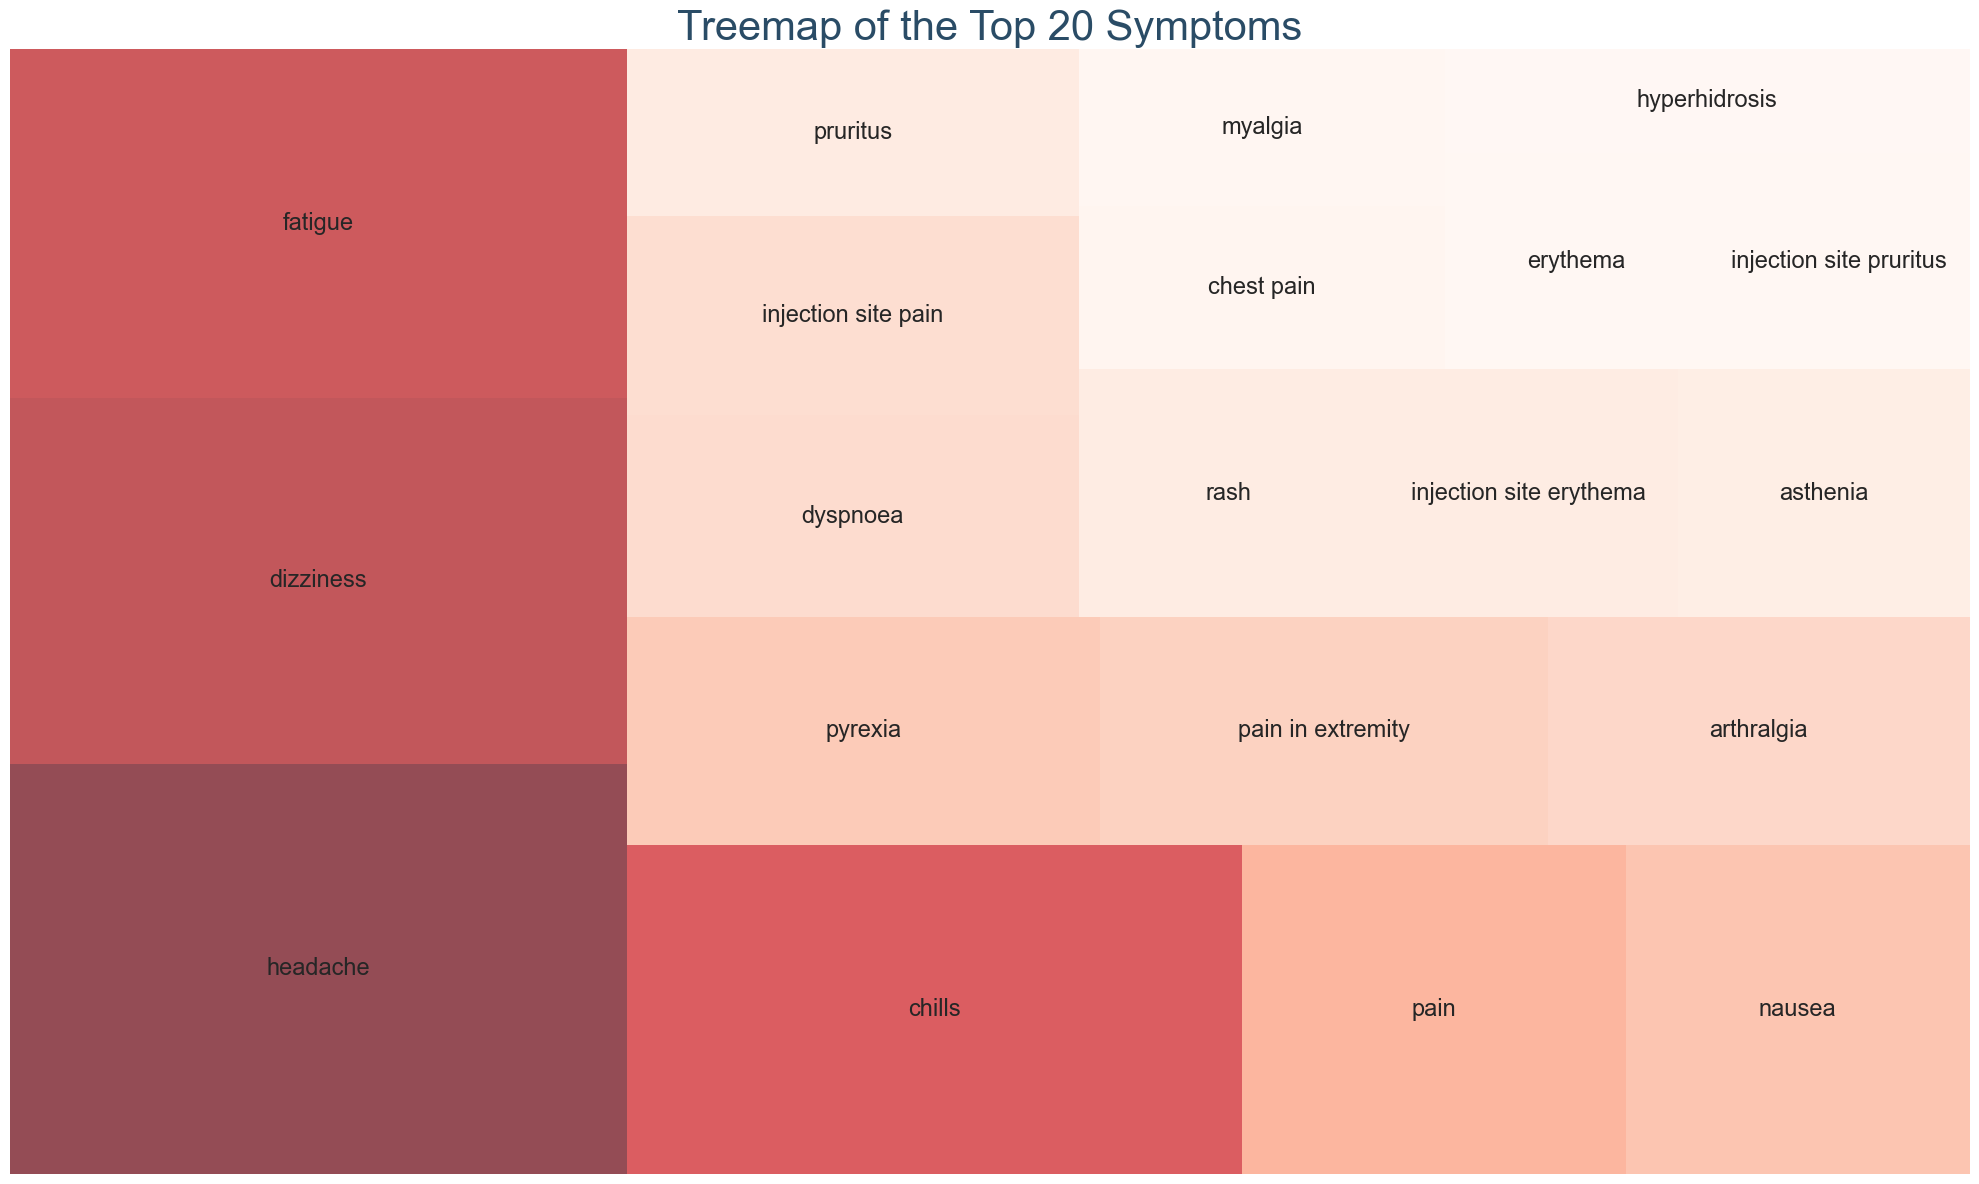

In [48]:
import squarify 
import matplotlib

plt.figure(figsize=(20,12))

my_values = lists.Count
cmap = matplotlib.cm.Reds
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]

squarify.plot(sizes=lists.Count, label=lists.Symptoms, alpha=0.7,
             text_kwargs={'fontsize':17},color=colors,)

plt.text(50,100,'Treemap of the Top 20 Symptoms', fontsize = 30, horizontalalignment='center',
        verticalalignment='bottom',zorder = 30,color='#2a4c66')

plt.axis('off')
plt.tight_layout()
plt.show()

### Data Cleaning

Using the top 20 symptoms to filter the SYMPTOMS1

In [49]:
mask = lists['Symptoms'].tolist()

In [50]:
lists['Symptoms'].tolist()

['headache',
 'dizziness',
 'fatigue',
 'chills',
 'pain',
 'nausea',
 'pyrexia',
 'pain in extremity',
 'arthralgia',
 'dyspnoea',
 'injection site pain',
 'pruritus',
 'rash',
 'injection site erythema',
 'asthenia',
 'chest pain',
 'myalgia',
 'erythema',
 'injection site pruritus',
 'hyperhidrosis']

In [51]:
df['SYMPTOM1'] = df['SYMPTOM1'].str.lower()

In [52]:
df= df[df['SYMPTOM1'].isin(lists['Symptoms'].tolist())]

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21425 entries, 3 to 56485
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VAERS_ID         21425 non-null  int64  
 1   SYMPTOM1         21425 non-null  object 
 2   SYMPTOM2         19388 non-null  object 
 3   SYMPTOM3         15914 non-null  object 
 4   SYMPTOM4         12038 non-null  object 
 5   SYMPTOM5         8459 non-null   object 
 6   VAX_MANU         21425 non-null  object 
 7   VAX_DOSE_SERIES  21323 non-null  object 
 8   VAX_ROUTE        18026 non-null  object 
 9   VAX_SITE         21425 non-null  object 
 10  STATE            21425 non-null  object 
 11  AGE_YRS          20947 non-null  float64
 12  CAGE_YR          19462 non-null  float64
 13  SEX              21425 non-null  object 
 14  DIED             21425 non-null  object 
 15  L_THREAT         21425 non-null  object 
 16  HOSPITAL         21425 non-null  object 
 17  HOSPDAYS    

### Findings for the Data Preparation


#### Fixing the TODAYS_DATE

In [54]:
df['TODAYS_DATE'] = pd.to_datetime(df['TODAYS_DATE'])

In [55]:
df = df[(df['TODAYS_DATE'].dt.year == 2021)]
df.describe(include='datetime')

,TODAYS_DATE
count,21359
unique,309
top,2021-08-11 00:00:00
freq,354
first,2021-01-01 00:00:00
last,2021-11-05 00:00:00


#### Fixing the VAX_DOSE_SERIES

In [56]:
df['VAX_DOSE_SERIES'].value_counts()

1      12084
2       6435
UNK     2360
3        356
5         11
7+         5
6          3
4          3
Name: VAX_DOSE_SERIES, dtype: int64

In [57]:
df['VAX_DOSE_SERIES'].isnull().sum()

102

In [58]:
df = (df.loc[df['VAX_DOSE_SERIES'] != 'UNK'] )
df = (df.loc[df['VAX_DOSE_SERIES'] != '7+'])

Fill all the null values with mode = 1

In [59]:
df['VAX_DOSE_SERIES'].fillna(1, inplace= True)

Converting the values to int64

In [60]:
df['VAX_DOSE_SERIES'] = df['VAX_DOSE_SERIES'].astype('int64')

Dropping the series with more than 3

In [61]:
df = df[df.VAX_DOSE_SERIES <= 3]

In [62]:
df['VAX_DOSE_SERIES'].value_counts()

1    12186
2     6435
3      356
Name: VAX_DOSE_SERIES, dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18977 entries, 3 to 56481
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   VAERS_ID         18977 non-null  int64         
 1   SYMPTOM1         18977 non-null  object        
 2   SYMPTOM2         17209 non-null  object        
 3   SYMPTOM3         14157 non-null  object        
 4   SYMPTOM4         10744 non-null  object        
 5   SYMPTOM5         7571 non-null   object        
 6   VAX_MANU         18977 non-null  object        
 7   VAX_DOSE_SERIES  18977 non-null  int64         
 8   VAX_ROUTE        16860 non-null  object        
 9   VAX_SITE         18977 non-null  object        
 10  STATE            18977 non-null  object        
 11  AGE_YRS          18565 non-null  float64       
 12  CAGE_YR          17175 non-null  float64       
 13  SEX              18977 non-null  object        
 14  DIED             18977 non-null  objec

In [64]:
df_impute= pd.DataFrame(df[['AGE_YRS', 'CAGE_YR']])
df_impute.corr()

,AGE_YRS,CAGE_YR
AGE_YRS,1.000000,0.995675
CAGE_YR,0.995675,1.000000


In [65]:
linear_reg = LinearRegression()
imputer = IterativeImputer(estimator = linear_reg,verbose=2,max_iter=100)

In [66]:
df_imputed = imputer.fit_transform(df_impute)

[IterativeImputer] Completing matrix with shape (18977, 2)
[IterativeImputer] Ending imputation round 1/100, elapsed time 0.01
[IterativeImputer] Change: 71.39145785437108, scaled tolerance: 0.12 
[IterativeImputer] Ending imputation round 2/100, elapsed time 0.01
[IterativeImputer] Change: 0.3215558024087031, scaled tolerance: 0.12 
[IterativeImputer] Ending imputation round 3/100, elapsed time 0.02
[IterativeImputer] Change: 0.000661905122555595, scaled tolerance: 0.12 
[IterativeImputer] Early stopping criterion reached.


In [67]:
df_imputed = pd.DataFrame(df_imputed).astype('int64')
df_imputed.rename(columns= {0:'AGE_YRS',1:'CAGE_YR'}, inplace=True)
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18977 entries, 0 to 18976
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   AGE_YRS  18977 non-null  int64
 1   CAGE_YR  18977 non-null  int64
dtypes: int64(2)
memory usage: 296.6 KB


In [68]:
df = df.drop(['CAGE_YR','AGE_YRS'],axis=1)

In [69]:
df.reset_index(drop=True, inplace=True)
df['AGE_YRS'] = df_imputed['AGE_YRS']

In [70]:
def condition(x):
    return x > 100
print('Count of Age over 100 :' ,sum(condition(x) for x in df['AGE_YRS']))

Count of Age over 100 : 3


### Fixing the HOSPDAYS, HOSPDAYS and NUMDAYS

In [71]:
(pd.DataFrame(df['HOSPDAYS'])).describe()

,HOSPDAYS
count,192.000000
mean,5.171875
std,9.471735
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,95.000000


In [72]:
(pd.DataFrame(df['HOSPITAL'])).describe()

,HOSPITAL
count,18977
unique,2
top,N
freq,18712


In [73]:
(pd.DataFrame(df['NUMDAYS'])).describe()

,NUMDAYS
count,18977.000000
mean,4.068978
std,14.598095
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,365.000000


In [74]:
df['HOSPITAL'] = df['HOSPITAL'].fillna('N')

In [75]:
pd.DataFrame(df['HOSPITAL']).describe()

,HOSPITAL
count,18977
unique,2
top,N
freq,18712


In [76]:
mask = df['HOSPITAL'] == 'N'
df.loc[mask, 'HOSPDAYS'] = 0
(pd.DataFrame(df['HOSPDAYS'])).describe()

,HOSPDAYS
count,18904.000000
mean,0.052529
std,1.084165
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,95.000000


In [77]:
df['HOSPDAYS'] = df['HOSPDAYS'].replace(np.nan, 0 ).astype('int64')
(pd.DataFrame(df['HOSPDAYS'])).describe()

,HOSPDAYS
count,18977.000000
mean,0.052327
std,1.082082
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,95.000000


In [78]:
(pd.DataFrame(df['NUMDAYS'])).describe()

,NUMDAYS
count,18977.000000
mean,4.068978
std,14.598095
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,365.000000


In [79]:
df['NUMDAYS'] = df['NUMDAYS'].fillna(df['NUMDAYS'].mean()).astype('int64')
(pd.DataFrame(df['NUMDAYS'])).describe()

,NUMDAYS
count,18977.000000
mean,4.068978
std,14.598095
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,365.000000


### Fixing CUR_ILL, HISTORY and ALLERGIES

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18977 entries, 0 to 18976
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   VAERS_ID         18977 non-null  int64         
 1   SYMPTOM1         18977 non-null  object        
 2   SYMPTOM2         17209 non-null  object        
 3   SYMPTOM3         14157 non-null  object        
 4   SYMPTOM4         10744 non-null  object        
 5   SYMPTOM5         7571 non-null   object        
 6   VAX_MANU         18977 non-null  object        
 7   VAX_DOSE_SERIES  18977 non-null  int64         
 8   VAX_ROUTE        16860 non-null  object        
 9   VAX_SITE         18977 non-null  object        
 10  STATE            18977 non-null  object        
 11  SEX              18977 non-null  object        
 12  DIED             18977 non-null  object        
 13  L_THREAT         18977 non-null  object        
 14  HOSPITAL         18977 non-null  objec

#### Addressing Columns with NULL VALUES

In [81]:
percentage_missing = (round(df.isnull().  sum() * 100/ len(df),2).sort_values(ascending=False))
display(pd.DataFrame({'Missing Percentage' :percentage_missing}));

,Missing Percentage
SYMPTOM5,60.10
SYMPTOM4,43.38
SYMPTOM3,25.40
VAX_ROUTE,11.16
SYMPTOM2,9.32
VAERS_ID,0.00
HOSPITAL,0.00
ER_ED_VISIT,0.00
OFC_VISIT,0.00
NUMDAYS,0.00


RECOVD

In [82]:
df['RECOVD'].isnull().sum()

0

In [83]:
(pd.DataFrame(df['RECOVD'])).describe()

,RECOVD
count,18977
unique,3
top,Y
freq,8911


In [84]:
(pd.DataFrame(df['RECOVD'])).value_counts()

RECOVD
Y         8911
N         7103
U         2963
dtype: int64

In [85]:
df['RECOVD'] = df['RECOVD'].fillna('N')

In [86]:
df = df[df.RECOVD !='U']

VAX_ROUT

In [87]:
(pd.DataFrame(df['VAX_ROUTE'])).describe()

,VAX_ROUTE
count,14154
unique,7
top,IM
freq,8638


In [88]:
(pd.DataFrame(df['VAX_ROUTE'])).value_counts()

VAX_ROUTE
IM           8638
SYR          4379
OT            998
UN             65
SC             63
ID              8
JET             3
dtype: int64

In [89]:
df['VAX_ROUTE'] = df['VAX_ROUTE'].fillna('IM')
(pd.DataFrame(df['VAX_ROUTE'])).describe()

,VAX_ROUTE
count,16014
unique,7
top,IM
freq,10498


In [90]:
df = df[df['VAX_ROUTE'].str.contains('UN|SC|ID|JET') == False]
(pd.DataFrame(df['VAX_ROUTE'])).describe()

,VAX_ROUTE
count,15875
unique,3
top,IM
freq,10498


VAX_SITE

In [91]:
(pd.DataFrame(df['VAX_SITE'])).describe()

,VAX_SITE
count,15875
unique,7
top,LA
freq,12687


In [92]:
(pd.DataFrame(df['VAX_SITE'])).value_counts()

VAX_SITE
LA          12687
RA           2866
AR            184
UN            121
LL              8
RL              5
OT              4
dtype: int64

In [93]:
df['VAX_SITE'] = df['VAX_SITE'].fillna('LA')
(pd.DataFrame(df['VAX_SITE'])).describe()

,VAX_SITE
count,15875
unique,7
top,LA
freq,12687


In [94]:
df = df[df['VAX_SITE'].str.contains('UN|LL|OT|RL|GM|LG') == False]
(pd.DataFrame(df['VAX_SITE'])).describe()

,VAX_SITE
count,15737
unique,3
top,LA
freq,12687


In [95]:
(pd.DataFrame(df['OFC_VISIT'])).describe()

,OFC_VISIT
count,15737
unique,2
top,N
freq,12831


In [96]:
df['OFC_VISIT'] = df['OFC_VISIT'].fillna('N')
(pd.DataFrame(df['OFC_VISIT'])).describe()

,OFC_VISIT
count,15737
unique,2
top,N
freq,12831


ER_ED_VISIT

In [97]:
(pd.DataFrame(df['ER_ED_VISIT'])).describe()

,ER_ED_VISIT
count,15737
unique,2
top,N
freq,14559


In [98]:
df['ER_ED_VISIT'] = df['ER_ED_VISIT'].fillna('N')
(pd.DataFrame(df['ER_ED_VISIT'])).describe()

,ER_ED_VISIT
count,15737
unique,2
top,N
freq,14559


DISABLE

In [99]:
df['DISABLE'] = df['DISABLE'].fillna('N')
(pd.DataFrame(df['DISABLE'])).describe()

,DISABLE
count,15737
unique,2
top,N
freq,15581


L_THREAT

In [100]:
(pd.DataFrame(df['L_THREAT'])).describe()

,L_THREAT
count,15737
unique,2
top,N
freq,15670


In [101]:
df['L_THREAT'] = df['L_THREAT'].fillna('N')
(pd.DataFrame(df['L_THREAT'])).describe()

,L_THREAT
count,15737
unique,2
top,N
freq,15670


DIED

In [102]:
(pd.DataFrame(df['DIED'])).describe()

,DIED
count,15737
unique,2
top,N
freq,15710


In [103]:
df['DIED'] = df['DIED'].fillna('N')
(pd.DataFrame(df['DIED'])).describe()

,DIED
count,15737
unique,2
top,N
freq,15710


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15737 entries, 0 to 18976
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   VAERS_ID         15737 non-null  int64         
 1   SYMPTOM1         15737 non-null  object        
 2   SYMPTOM2         14308 non-null  object        
 3   SYMPTOM3         11864 non-null  object        
 4   SYMPTOM4         9041 non-null   object        
 5   SYMPTOM5         6379 non-null   object        
 6   VAX_MANU         15737 non-null  object        
 7   VAX_DOSE_SERIES  15737 non-null  int64         
 8   VAX_ROUTE        15737 non-null  object        
 9   VAX_SITE         15737 non-null  object        
 10  STATE            15737 non-null  object        
 11  SEX              15737 non-null  object        
 12  DIED             15737 non-null  object        
 13  L_THREAT         15737 non-null  object        
 14  HOSPITAL         15737 non-null  objec

### Determining Outliers

In [105]:
(pd.DataFrame(df)).describe()

,VAERS_ID,VAX_DOSE_SERIES,HOSPDAYS,NUMDAYS,AGE_YRS
count,1.573700e+04,15737.000000,15737.000000,15737.000000,15737.000000
mean,1.256430e+06,1.390735,0.050772,3.909322,48.058207
std,2.508793e+05,0.526278,1.105931,14.118159,17.827823
min,9.166170e+05,1.000000,0.000000,0.000000,0.000000
25%,1.047490e+06,1.000000,0.000000,0.000000,34.000000
50%,1.196615e+06,1.000000,0.000000,1.000000,48.000000
75%,1.417268e+06,2.000000,0.000000,2.000000,62.000000
max,1.845483e+06,3.000000,95.000000,365.000000,119.000000


In [106]:
def condition(x):
    return x > 365
print('Count of HOSPDAYS over 365:' ,sum(condition(x) for x in df['HOSPDAYS']))

Count of HOSPDAYS over 365: 0


In [107]:
def condition(x):
    return x > 365
print('Count of NUMDAYS over 365:' ,sum(condition(x) for x in df['NUMDAYS']))

Count of NUMDAYS over 365: 0


In [108]:
df = df.loc[(df['HOSPDAYS']<=365) & (df['NUMDAYS']<=365)]

In [109]:
df2 = df.filter(['VAX_MANU', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE',
       'STATE', 'AGE_YRS', 'CAGE_YR', 'SEX',
       'DIED','L_THREAT',
       'HOSPITAL', 'HOSPDAYS','DISABLE', 'RECOVD',
       'NUMDAYS','OFC_VISIT', 'ER_ED_VISIT',], axis = 1)

In [110]:
for col in df2:
    print(col)
    print(df2[col].unique())
    print('\n')

VAX_MANU
['PFIZER\\BIONTECH' 'MODERNA' 'JANSSEN']


VAX_DOSE_SERIES
[1 2 3]


VAX_ROUTE
['IM' 'SYR' 'OT']


VAX_SITE
['LA' 'RA' 'AR']


STATE
['CA']


AGE_YRS
[ 35  25  37  42  40  58  39  33  41  60  48  46  63  49  45  20  56  62
  51  28  26  57  44  29  53  31  30  24  32  38  47  64  50  52  36  34
  55  27  67  54  59  23  61  43  66  21  73  22  71  80  65  69  72  85
  68  74  99  89  86  18  17  92  19  70  76  75  82  87  81  94  88  90
  78  84  96  95  83  77  16  79   0  93  97  91 100  15  14  12  13 101
 119]


SEX
['F' 'M']


DIED
['N' 'Y']


L_THREAT
['N' 'Y']


HOSPITAL
['N' 'Y']


HOSPDAYS
[ 0  7  2  1  6  4  3  5 14  9 20  8 50 25 18 17 95 13 12 10 28 47]


DISABLE
['N' 'Y']


RECOVD
['Y' 'N']


NUMDAYS
[  0   1   8   2   3   5   7   9   6   4  18  11  10  14  17  13  20  21
  16  22  12  31  19  23  15  30  28  32  36  27  38  25  77  33  24  26
  53  29 365  50  62  42  93  47  59  79  90  60  46  41  58  35  57  86
  34  49  98  83  70  95  37  48  39 121  64  45

In [111]:
df =df[df.VAX_MANU !='UNKNOWN MANUFACTURER']

In [112]:
df =df[df.SEX !='U']

### Creating the Working Dataset

In [113]:
df = df.drop(['VAERS_ID','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5'],axis=1)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15737 entries, 0 to 18976
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SYMPTOM1         15737 non-null  object        
 1   VAX_MANU         15737 non-null  object        
 2   VAX_DOSE_SERIES  15737 non-null  int64         
 3   VAX_ROUTE        15737 non-null  object        
 4   VAX_SITE         15737 non-null  object        
 5   STATE            15737 non-null  object        
 6   SEX              15737 non-null  object        
 7   DIED             15737 non-null  object        
 8   L_THREAT         15737 non-null  object        
 9   HOSPITAL         15737 non-null  object        
 10  HOSPDAYS         15737 non-null  int64         
 11  TODAYS_DATE      15737 non-null  datetime64[ns]
 12  DISABLE          15737 non-null  object        
 13  RECOVD           15737 non-null  object        
 14  NUMDAYS          15737 non-null  int64

### Descriptive Statistic and Visualization of the Cleaned Working Data

In [115]:
(pd.DataFrame(df)).describe()

,VAX_DOSE_SERIES,HOSPDAYS,NUMDAYS,AGE_YRS
count,15737.000000,15737.000000,15737.000000,15737.000000
mean,1.390735,0.050772,3.909322,48.058207
std,0.526278,1.105931,14.118159,17.827823
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,34.000000
50%,1.000000,0.000000,1.000000,48.000000
75%,2.000000,0.000000,2.000000,62.000000
max,3.000000,95.000000,365.000000,119.000000


In [116]:
(pd.DataFrame(df.filter(['VAERS_ID', 'VAX_MANU', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE',
       'STATE', 'AGE_YRS', 'CAGE_YR', 'SEX','DIED','L_THREAT','HOSPITAL', 'HOSPDAYS','DISABLE', 'RECOVD',
       'NUMDAYS', 'CUR_ILL', 'HISTORY','VAX_DATE','ONSET_DATE' ,'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES'], axis = 1)).describe(include = object))

,VAX_MANU,VAX_ROUTE,VAX_SITE,STATE,SEX,DIED,L_THREAT,HOSPITAL,DISABLE,RECOVD,OFC_VISIT,ER_ED_VISIT
count,15737,15737,15737,15737,15737,15737,15737,15737,15737,15737,15737,15737
unique,3,3,3,1,2,2,2,2,2,2,2,2
top,MODERNA,IM,LA,CA,F,N,N,N,N,Y,N,N
freq,7824,10380,12687,15737,11692,15710,15670,15546,15581,8765,12831,14559


## Visualizations

### Age Distribution by Sex

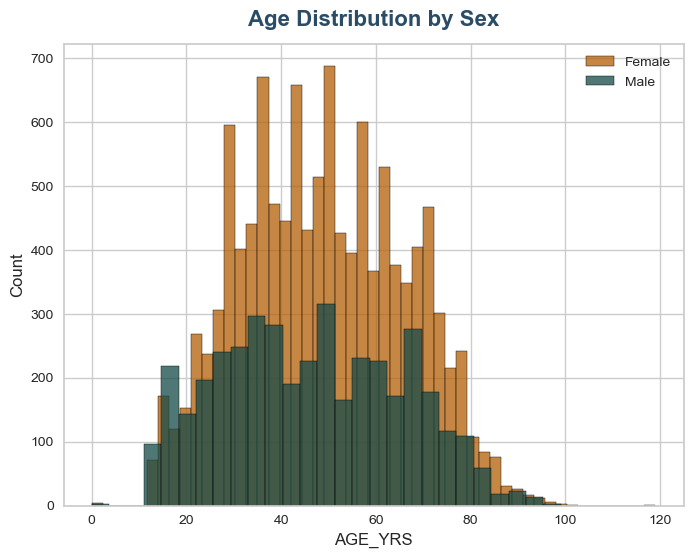

In [117]:
plt.subplots(figsize=(8,6), dpi=100)
sns.histplot( df.loc[df.SEX=='F', "AGE_YRS"] , color="#b45f06", label="Female")
sns.histplot( df.loc[df.SEX=='M', "AGE_YRS"] , color="#144a47", label="Male")

plt.title('Age Distribution by Sex', fontsize=16, weight='bold', y=1.02,color='#2a4c66' );
plt.legend();

### Vaccine Manufacturers

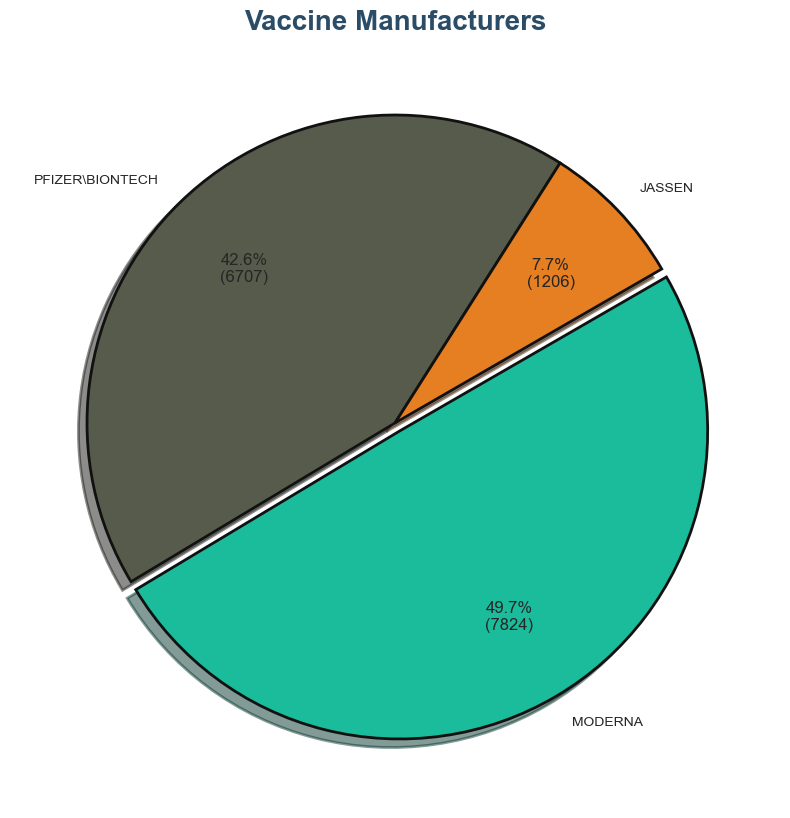

In [118]:
plt.figure(figsize=(20,10))
labels = ["MODERNA", "PFIZER\BIONTECH", "JASSEN",]
colors = ["#1abc9c", "#565b4b", "#e67e22",]
explode = [0.03,0.0,0.0]
wedge_properties = {"edgecolor":"k",'linewidth': 2}

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

plt.pie(df['VAX_MANU'].value_counts(), labels=labels, explode=explode, colors=colors, startangle=30,
           counterclock=False, shadow=True, wedgeprops=wedge_properties,
           autopct=autopct_format(df['VAX_MANU'].value_counts()), pctdistance=0.7)

plt.title("Vaccine Manufacturers", fontsize=20, weight='bold',color='#2a4c66')
plt.show()

### Vaccine Dose Series

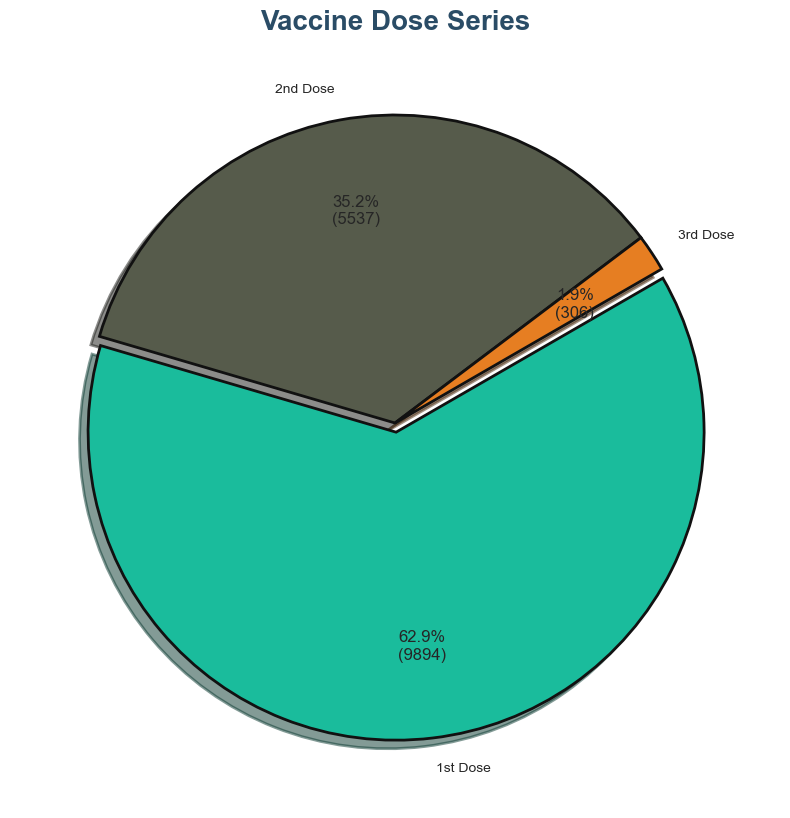

In [119]:
plt.figure(figsize=(20,10))
labels = ["1st Dose", "2nd Dose", "3rd Dose",]
colors = ["#1abc9c", "#565b4b", "#e67e22",]
explode = [0.03,0.0,0.0]
wedge_properties = {"edgecolor":"k",'linewidth': 2}

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

plt.pie(df['VAX_DOSE_SERIES'].value_counts(), labels=labels, explode=explode, colors=colors, startangle=30,
           counterclock=False, shadow=True, wedgeprops=wedge_properties,
           autopct=autopct_format(df['VAX_DOSE_SERIES'].value_counts()), pctdistance=0.7)
plt.title("Vaccine Dose Series", fontsize=20, weight='bold',color='#2a4c66')
plt.show()

### Age Distribution by Vaccination Type

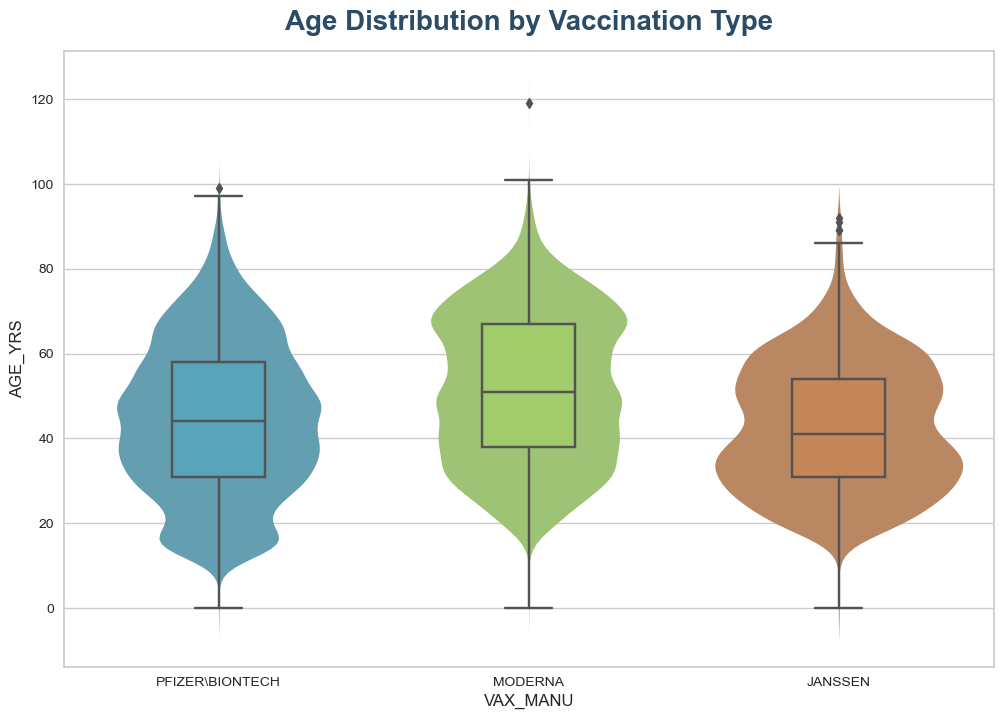

In [120]:
plt.figure(figsize=(12,8))

ax = sns.violinplot(x='VAX_MANU',y='AGE_YRS',data=df,
                    palette='turbo', inner=None, linewidth=0, saturation=0.4)

sns.boxplot(x='VAX_MANU',y='AGE_YRS',data=df, palette ='turbo',ax=ax,boxprops={'zorder': 2},
                     saturation=0.5, width=0.3)


plt.title("Age Distribution by Vaccination Type",fontsize=20, weight='bold', y=1.02,color='#2a4c66');

### Vaccination Type by Age by Sex

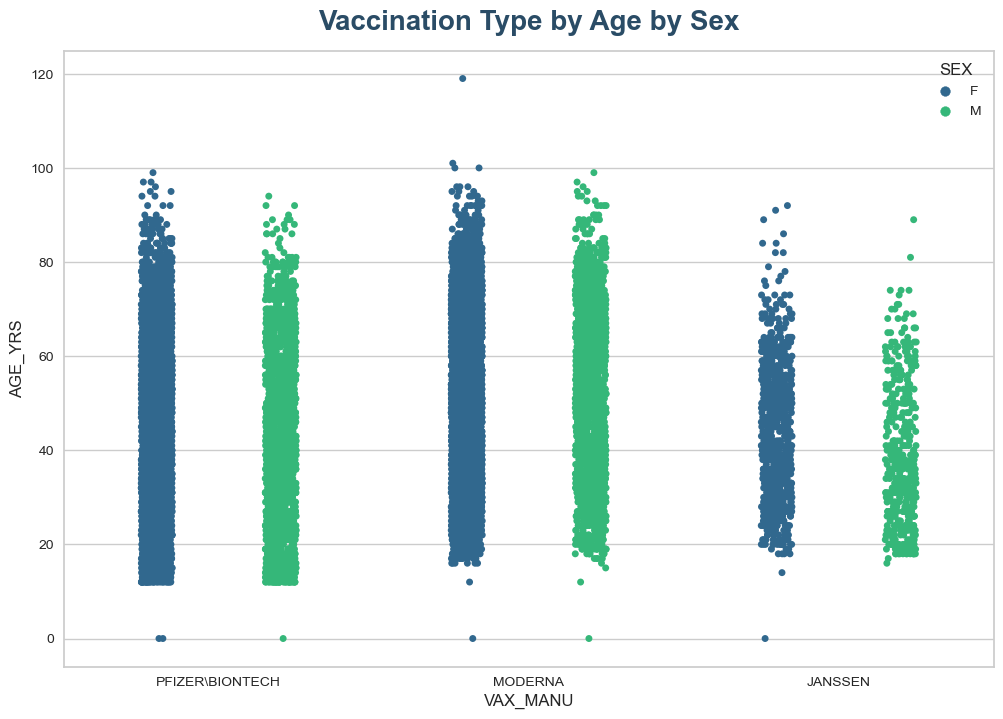

In [121]:
plt.figure(figsize=(12,8))
sns.stripplot(x='VAX_MANU',y='AGE_YRS', data=(df.loc[df['VAX_MANU']!='UNKNOWN MANUFACTURER']), 
               jitter=True,hue='SEX', dodge=True, palette='viridis')
plt.title("Vaccination Type by Age by Sex",fontsize=20, weight='bold', y=1.02,color='#2a4c66')
plt.show();

### Top 10 Symptoms Per Symptom Feature - Pie Chart
These piecharts show the top ten symptoms in order as listed by the medical practitioner when a person was advising of an adverse effect to the covid 19 vaccine.

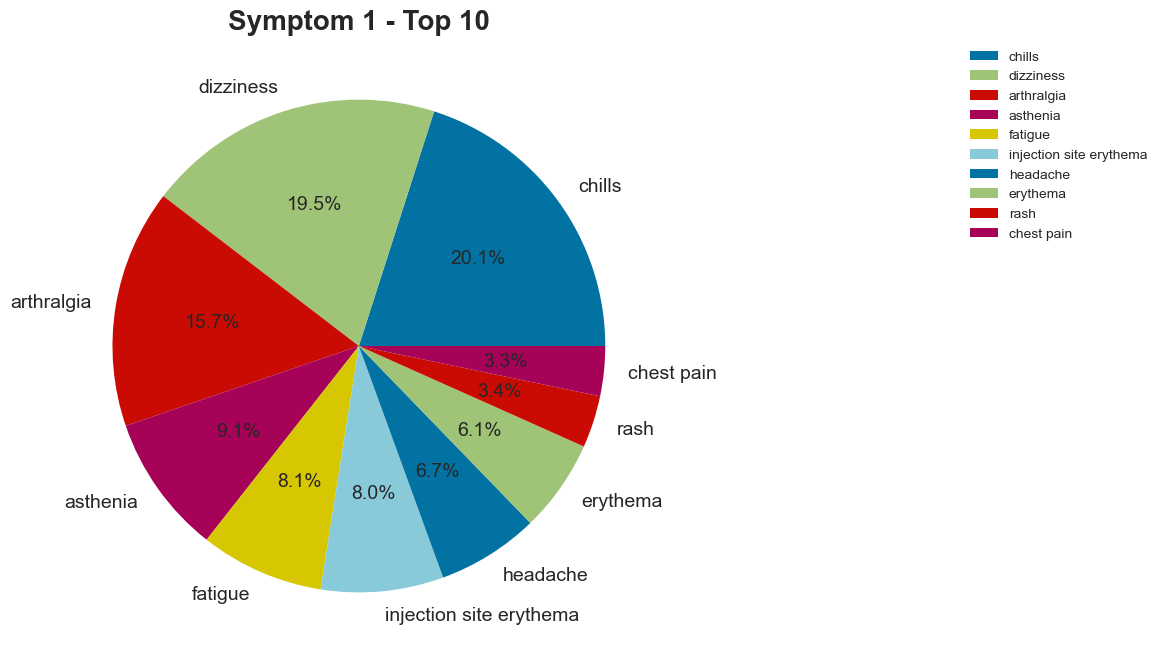

In [122]:
plt.figure(figsize=(16,8))
ax = df['SYMPTOM1'].value_counts().nlargest(10).plot(kind='pie', fontsize=14, autopct='%1.1f%%', legend = True, label='')
ax.set_title("Symptom 1 - Top 10", fontsize=20, weight='bold')
plt.legend(loc="best", bbox_to_anchor=(1.3, 0.5, 0.5, 0.5));

### Died - Pie Chart
In order to plot the pie chart for whether a person died, we fist had to fill the nan values with 0 and 'Y' value as 1. We can see that 1.1% of patients who reported an adverse effect to the vaccine eventually died.

In [123]:
df['DIED'] = df['DIED'].fillna(0)

In [124]:
df['DIED'] = df["DIED"].replace({'Y': '1'})

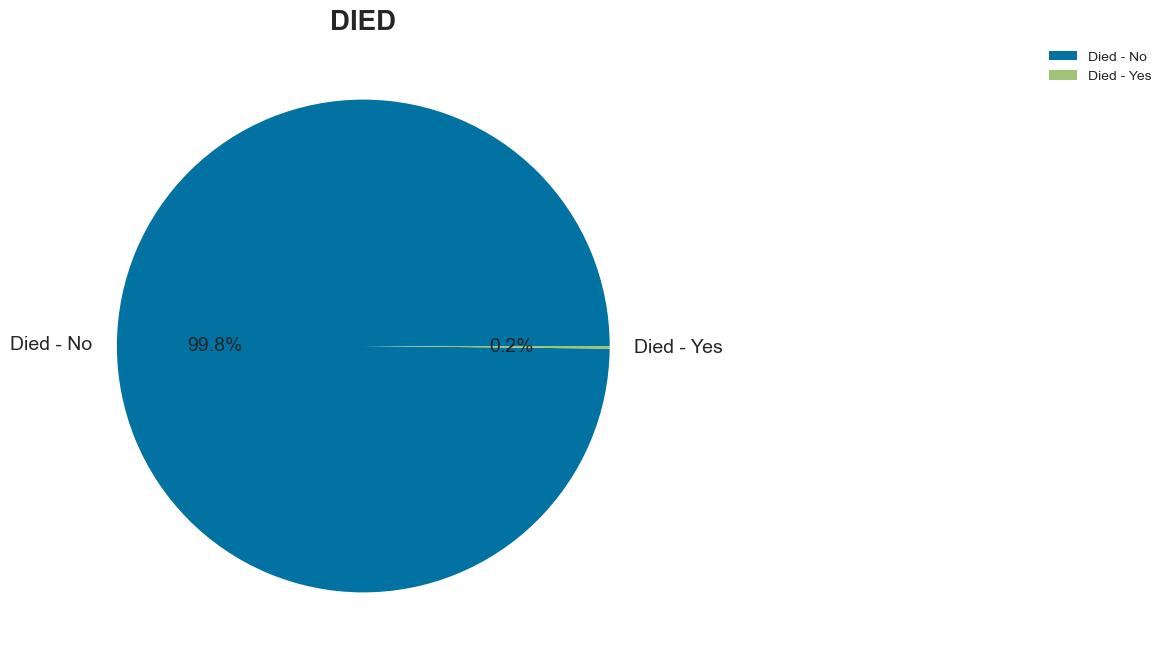

In [125]:
labels = ['Died - No', 'Died - Yes']
plt.figure(figsize=(16,8))
ax = df['DIED'].value_counts().plot(kind='pie', fontsize=14, autopct='%1.1f%%', legend = True, labels=labels, label='')
ax.set_title("DIED", fontsize=20, weight='bold')
plt.legend(loc="best", bbox_to_anchor=(1.3, 0.5, 0.5, 0.5));

### Top Vaccine Manufacturers - Pie Chart

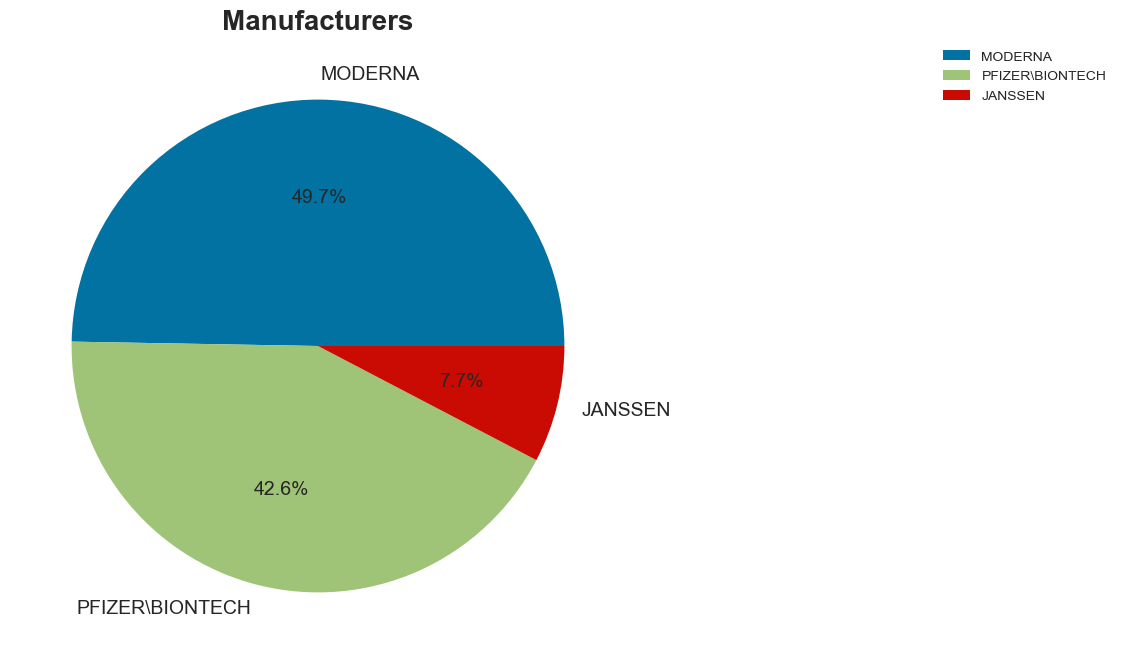

In [126]:
plt.figure(figsize=(16,8))
ax = df['VAX_MANU'].value_counts().plot(kind='pie', fontsize=14, autopct='%1.1f%%', legend = True, label='')
ax.set_title("Manufacturers", fontsize=20, weight='bold')
plt.legend(loc="best", bbox_to_anchor=(1.3, 0.5, 0.5, 0.5));

### Vaccine Manufacturer - Count Plot

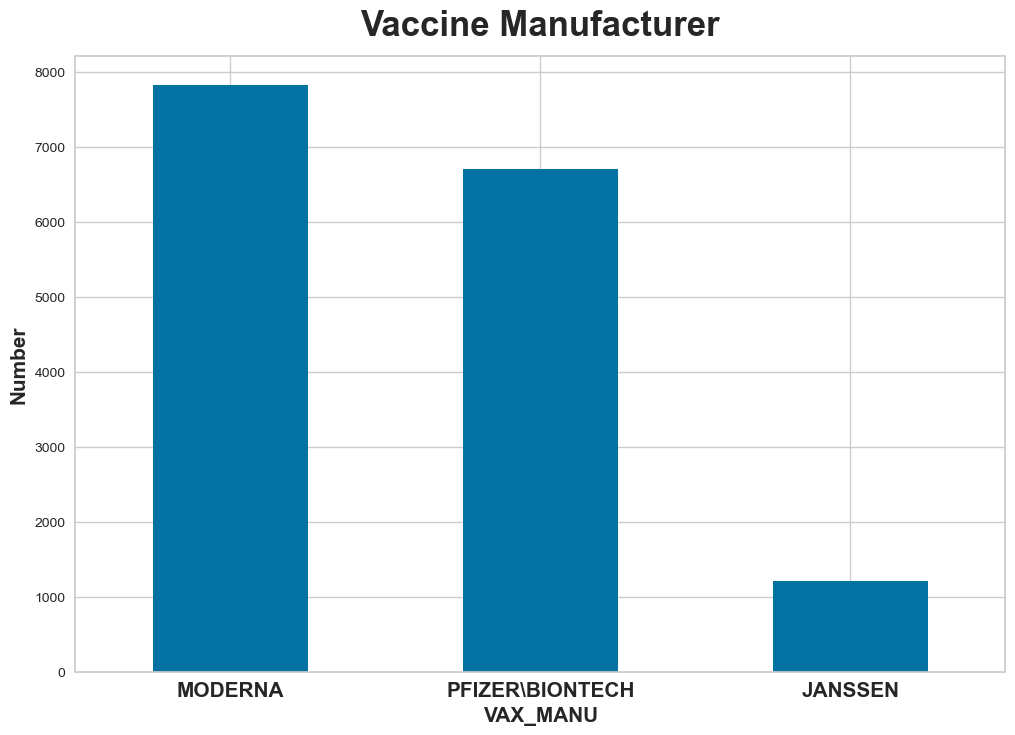

In [127]:
df['VAX_MANU'].value_counts().plot(kind='bar', figsize=(12,8));
plt.ylabel('Number', fontsize=15, weight='bold')
plt.xlabel('VAX_MANU', fontsize=15, weight='bold')
plt.xticks(fontsize=15, weight='bold', rotation = 0)
plt.title('Vaccine Manufacturer', fontsize=25, weight='bold', y=1.02);

### Sex - Pie Chart

We can see that females account for the majority of persons detailing an adverse effect

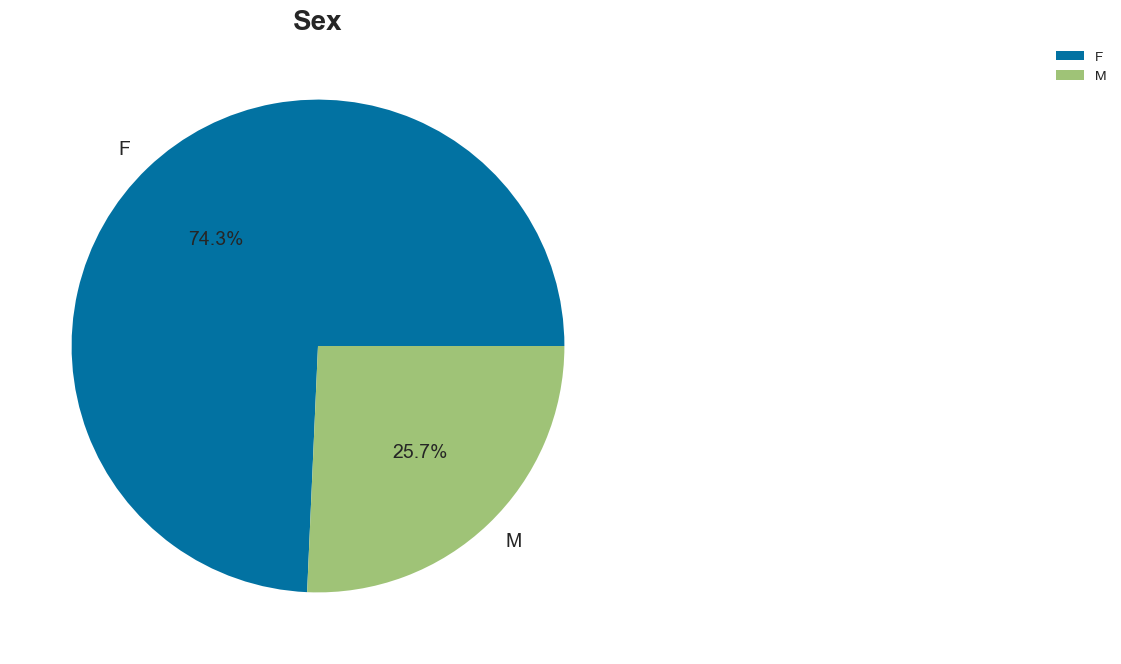

In [128]:
plt.figure(figsize=(16,8))
ax = df['SEX'].value_counts().plot(kind='pie', fontsize=14, autopct='%1.1f%%', legend = True, label='')
ax.set_title("Sex", fontsize=20, weight='bold')
plt.legend(loc="best", bbox_to_anchor=(1.3, 0.5, 0.5, 0.5));

### Sex - Count Plot

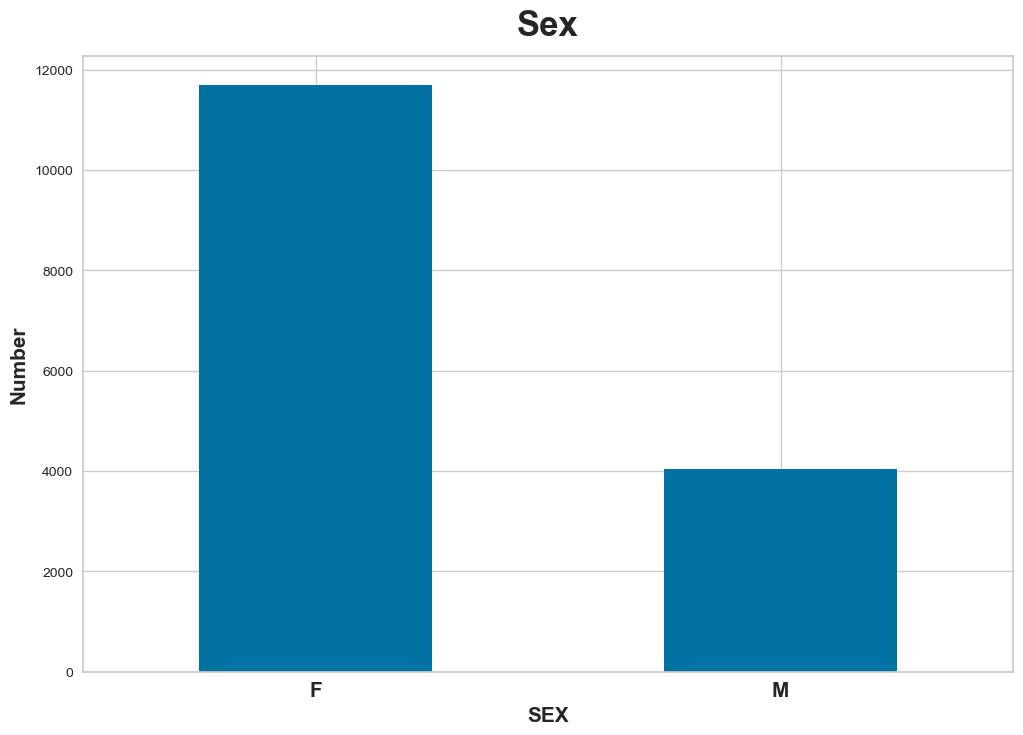

In [129]:
df['SEX'].value_counts().plot(kind='bar', figsize=(12,8));
plt.ylabel('Number', fontsize=15, weight='bold')
plt.xlabel('SEX', fontsize=15, weight='bold')
plt.xticks(fontsize=15, weight='bold', rotation = 0)
plt.title('Sex', fontsize=25, weight='bold', y=1.02);

### Hospital Days - Piechart
We can see that if a person spent time in hospital that two days was the most time spent.

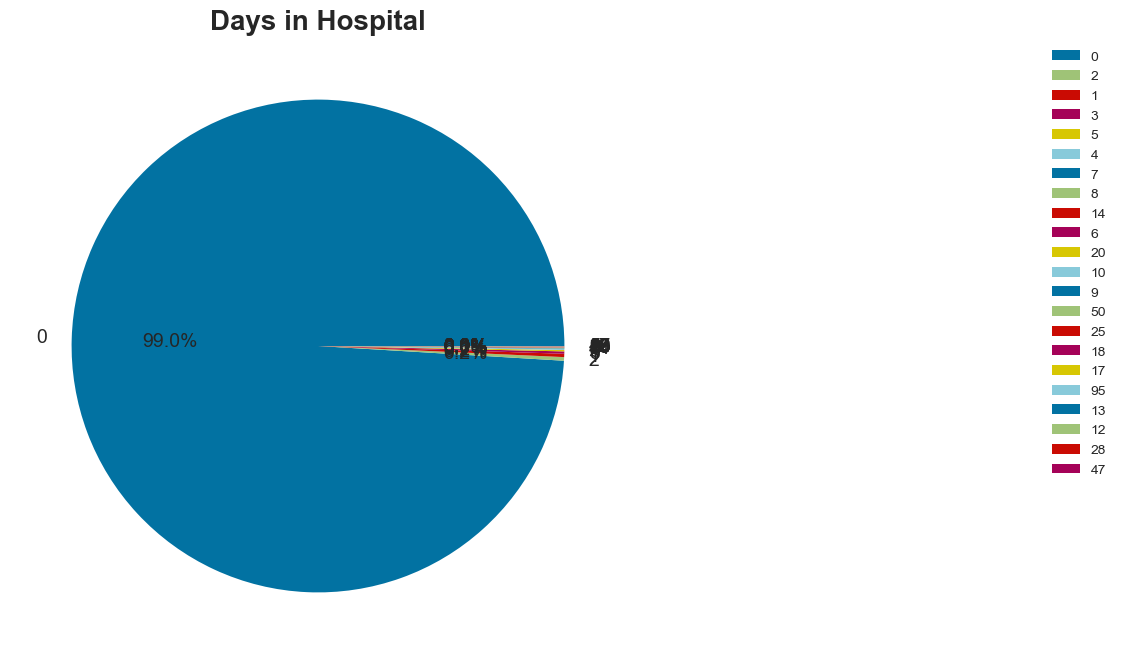

In [130]:
plt.figure(figsize=(16,8))
ax = df['HOSPDAYS'].value_counts().plot(kind='pie', fontsize=14, autopct='%1.1f%%', legend = True, label='')
ax.set_title("Days in Hospital", fontsize=20, weight='bold')
plt.legend(loc="best", bbox_to_anchor=(1.3, 0.5, 0.5, 0.5));

### Distribution of Ages - Histogram
The distribution of ages of persons reporting an adverse effect to the covid 19 vaccine.

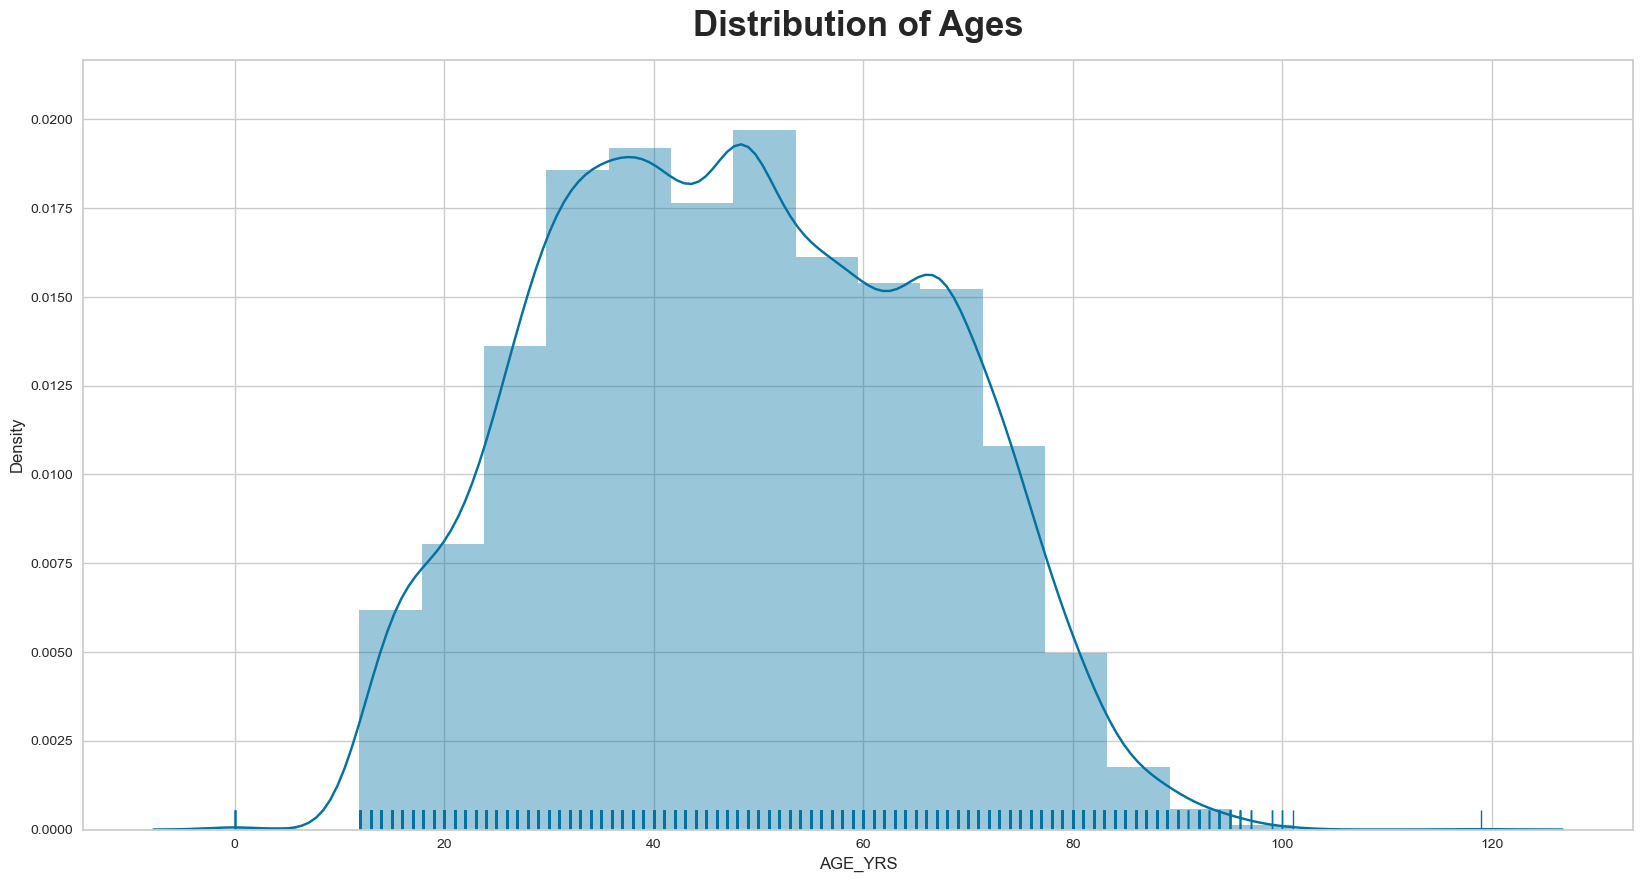

In [131]:
plt.figure(figsize=(20,10))
sns.distplot(df['AGE_YRS'], kde=True, bins=20, rug=True)
plt.title('Distribution of Ages', fontsize=25, weight='bold', y=1.02);

### Distribution of Ages - Boxplot

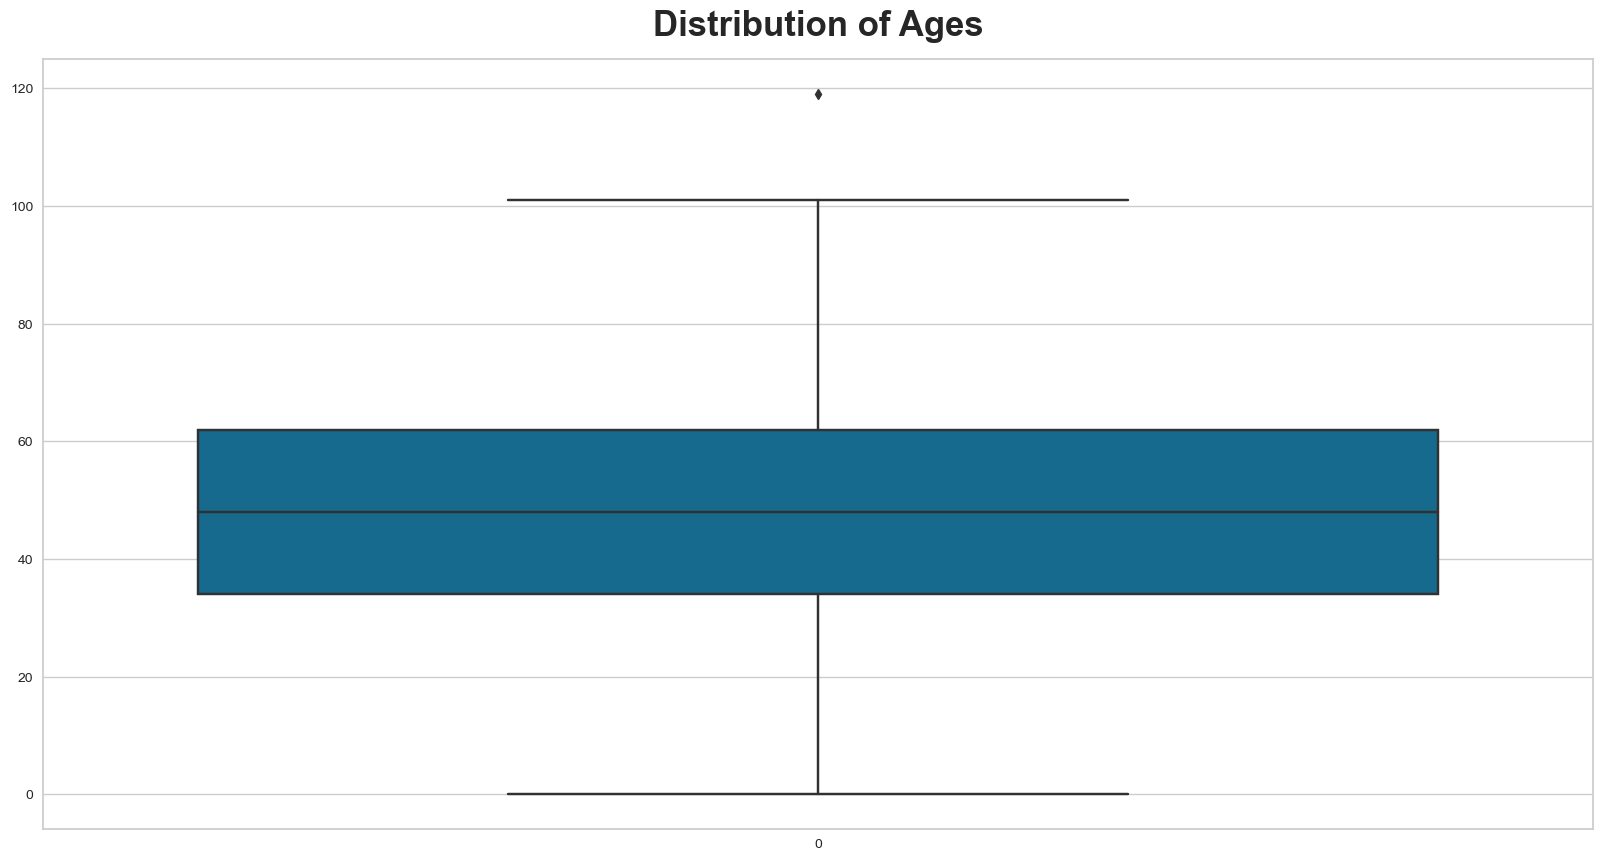

In [132]:
plt.figure(figsize=(20,10))
sns.boxplot(df['AGE_YRS'])
plt.title('Distribution of Ages', fontsize=25, weight='bold', y=1.02);

### Distribution of days in hospital - Histogram

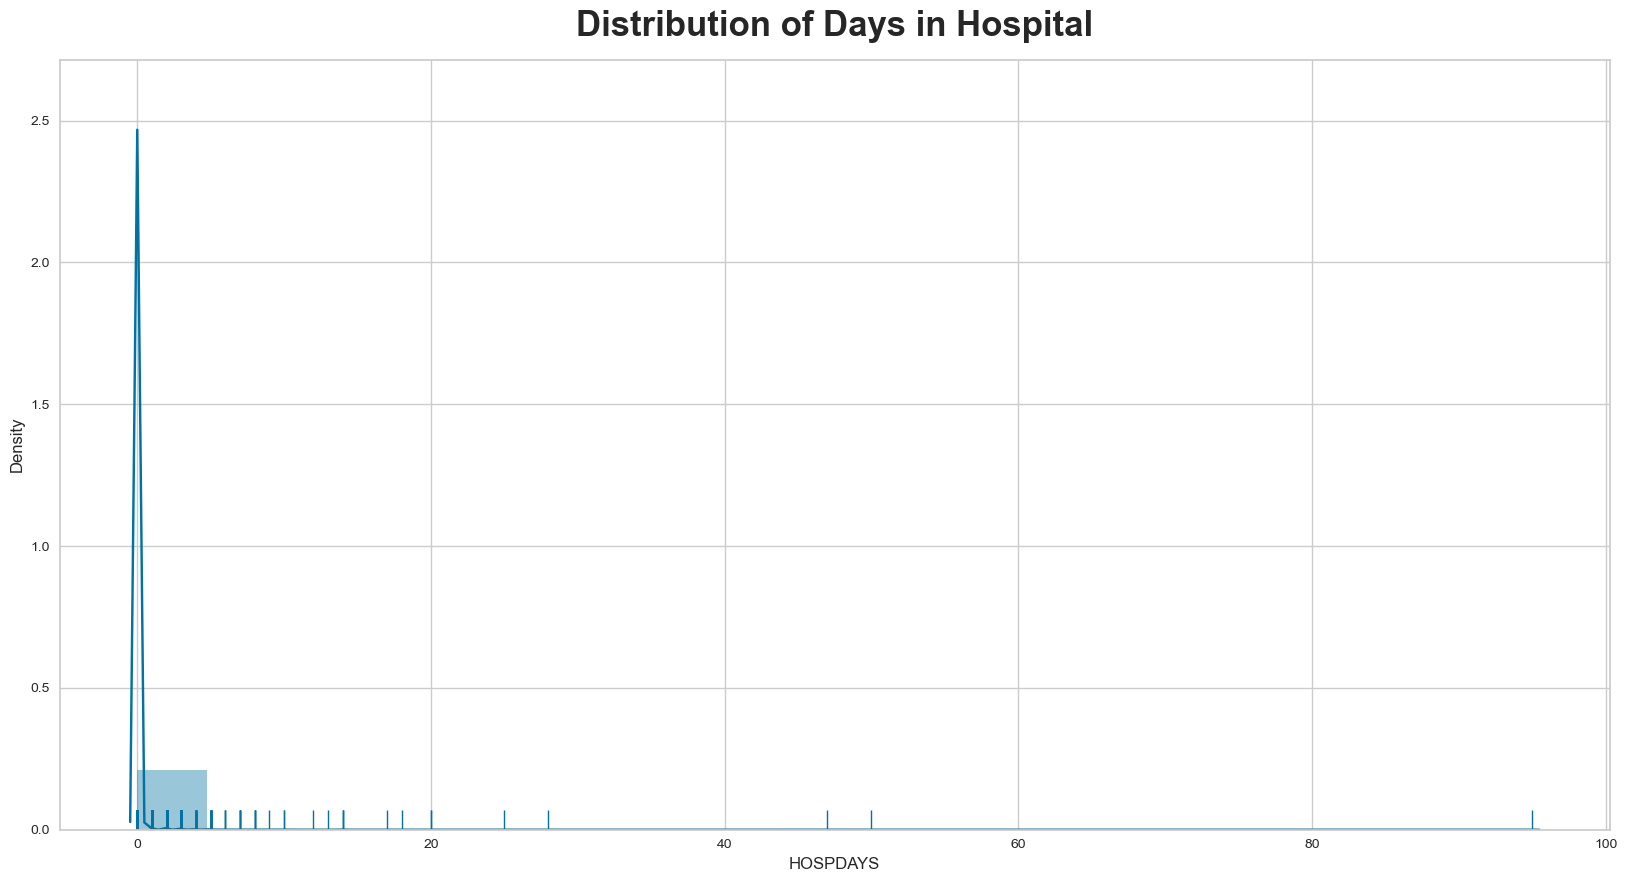

In [133]:
plt.figure(figsize=(20,10))
sns.distplot(df['HOSPDAYS'], kde=True, bins=20, rug=True)
plt.title('Distribution of Days in Hospital', fontsize=25, weight='bold', y=1.02);

### Distribution of days in hospital - Boxplot

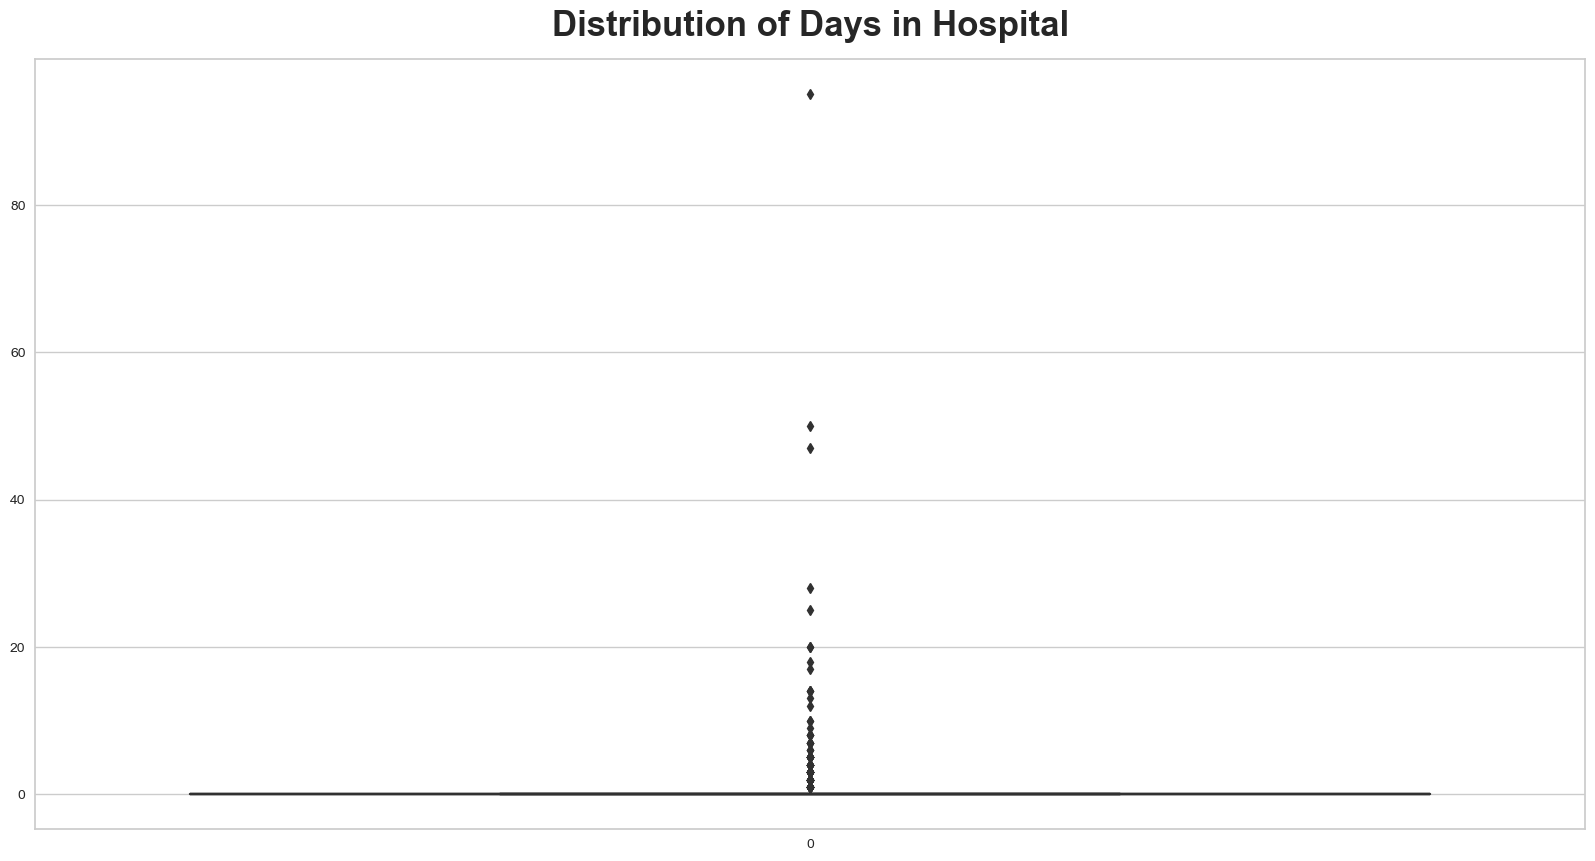

In [134]:
plt.figure(figsize=(20,10))
sns.boxplot(df['HOSPDAYS'])
plt.title('Distribution of Days in Hospital', fontsize=25, weight='bold', y=1.02);

### Correlations

#### Heatmap

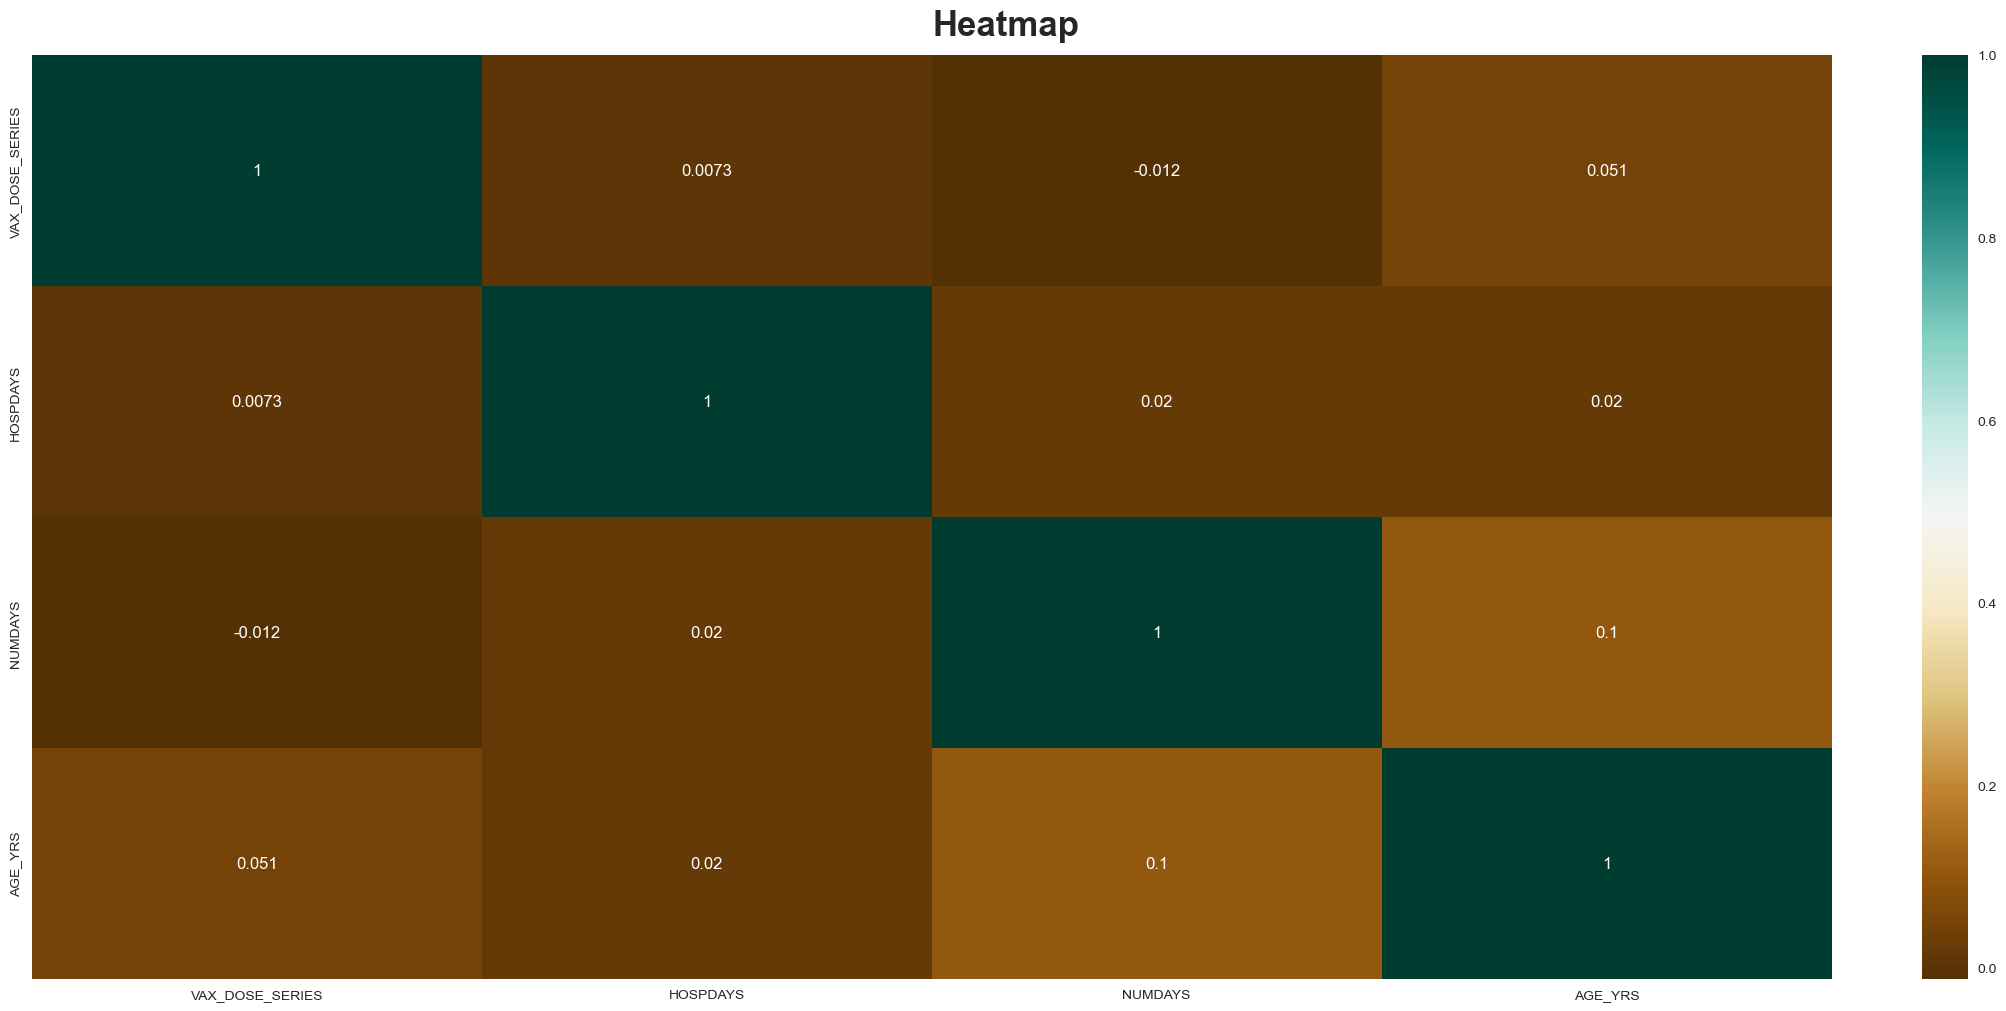

In [135]:
plt.figure(constrained_layout=True, figsize=(20,10))
c = df.corr()
sns.heatmap(c, cmap='BrBG', annot = True)
plt.suptitle("Heatmap", fontsize=25, weight='bold');

### Summary Visualisations

### Statistical Summary of Categorical Features

In [136]:
df.describe(include=object).T

,count,unique,top,freq
SYMPTOM1,15737,20,chills,2709
VAX_MANU,15737,3,MODERNA,7824
VAX_ROUTE,15737,3,IM,10380
VAX_SITE,15737,3,LA,12687
STATE,15737,1,CA,15737
SEX,15737,2,F,11692
DIED,15737,2,N,15710
L_THREAT,15737,2,N,15670
HOSPITAL,15737,2,N,15546
DISABLE,15737,2,N,15581


### 3. Data Preparation
### How many days will a person spend in hospital?
I will be seeking to predict how many days a person will spend in hospital (if any days) after they advise they have had an adverse symptom to the Covid 19 vaccine. From looking at the data dictionary, I will drop the features I don't believe are necessary to complete the regression prediction problem i.e. I will initially concentrate on the features I believe are important for completing this regression problem. I believe it is easier to choose the features I require than drop the features I don't require. This reduces the number of features from 52 to 7.

#### Shape before removing features

In [137]:
df.shape

(15737, 18)

### Number of missing values per feature
We will now check how missing values are in our remaining features and then decide whether to drop them or replace them with a meaningful value.

In [138]:
count_missing = ((df.isnull().sum()).sort_values(ascending=True))
count_missing

SYMPTOM1           0
OFC_VISIT          0
NUMDAYS            0
RECOVD             0
DISABLE            0
TODAYS_DATE        0
HOSPDAYS           0
HOSPITAL           0
L_THREAT           0
DIED               0
SEX                0
STATE              0
VAX_SITE           0
VAX_ROUTE          0
VAX_DOSE_SERIES    0
VAX_MANU           0
ER_ED_VISIT        0
AGE_YRS            0
dtype: int64

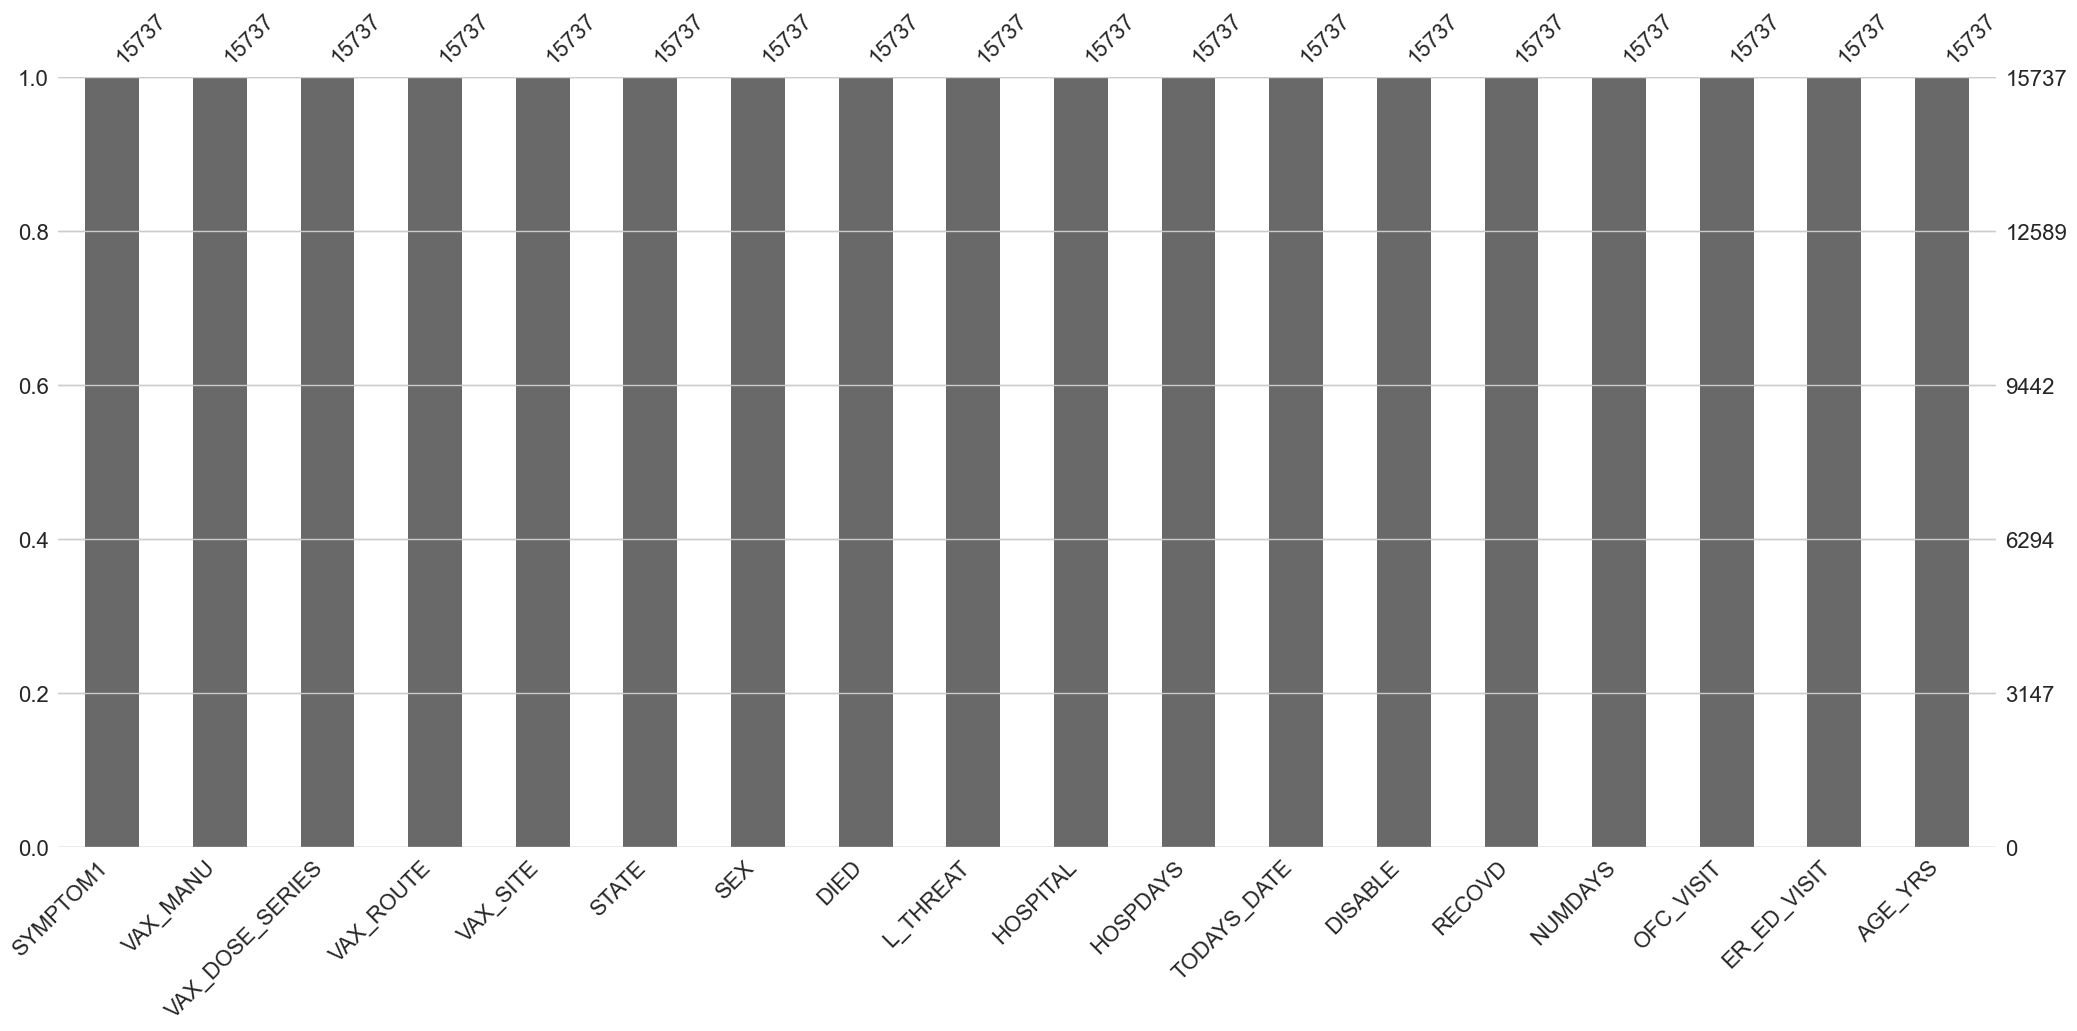

In [139]:
import missingno as msno
ax = msno.bar(df)

### Number of distinct values in each feature

In [140]:
for col in df.columns:
    print(col, ': Number of Distinct Values: ', len(df[col].unique()))

SYMPTOM1 : Number of Distinct Values:  20
VAX_MANU : Number of Distinct Values:  3
VAX_DOSE_SERIES : Number of Distinct Values:  3
VAX_ROUTE : Number of Distinct Values:  3
VAX_SITE : Number of Distinct Values:  3
STATE : Number of Distinct Values:  1
SEX : Number of Distinct Values:  2
DIED : Number of Distinct Values:  2
L_THREAT : Number of Distinct Values:  2
HOSPITAL : Number of Distinct Values:  2
HOSPDAYS : Number of Distinct Values:  22
TODAYS_DATE : Number of Distinct Values:  309
DISABLE : Number of Distinct Values:  2
RECOVD : Number of Distinct Values:  2
NUMDAYS : Number of Distinct Values:  137
OFC_VISIT : Number of Distinct Values:  2
ER_ED_VISIT : Number of Distinct Values:  2
AGE_YRS : Number of Distinct Values:  91


### Print the distinct values in each feature.

In [141]:
for col in df:
    print('COLUMN NAME: ', col,':')
    print(df[col].unique())
    print('\n')

COLUMN NAME:  SYMPTOM1 :
['chills' 'injection site erythema' 'fatigue' 'arthralgia' 'asthenia'
 'headache' 'pain' 'dizziness' 'nausea' 'pruritus' 'erythema' 'dyspnoea'
 'injection site pain' 'pain in extremity' 'rash' 'chest pain' 'pyrexia'
 'injection site pruritus' 'myalgia' 'hyperhidrosis']


COLUMN NAME:  VAX_MANU :
['PFIZER\\BIONTECH' 'MODERNA' 'JANSSEN']


COLUMN NAME:  VAX_DOSE_SERIES :
[1 2 3]


COLUMN NAME:  VAX_ROUTE :
['IM' 'SYR' 'OT']


COLUMN NAME:  VAX_SITE :
['LA' 'RA' 'AR']


COLUMN NAME:  STATE :
['CA']


COLUMN NAME:  SEX :
['F' 'M']


COLUMN NAME:  DIED :
['N' '1']


COLUMN NAME:  L_THREAT :
['N' 'Y']


COLUMN NAME:  HOSPITAL :
['N' 'Y']


COLUMN NAME:  HOSPDAYS :
[ 0  7  2  1  6  4  3  5 14  9 20  8 50 25 18 17 95 13 12 10 28 47]


COLUMN NAME:  TODAYS_DATE :
['2021-01-01T00:00:00.000000000' '2021-01-02T00:00:00.000000000'
 '2021-01-03T00:00:00.000000000' '2021-01-04T00:00:00.000000000'
 '2021-01-05T00:00:00.000000000' '2021-01-06T00:00:00.000000000'
 '2021-01-07T00

### Top values in the symptoms
We will use an underscore to join individual words in the symptoms features for the future machine learning model to enable encoding and use the code str.replace to achieve this task.

In [142]:
df['SYMPTOM1'].value_counts().nlargest(15)

chills                     2709
dizziness                  2638
arthralgia                 2115
asthenia                   1235
fatigue                    1096
injection site erythema    1086
headache                    904
erythema                    819
rash                        461
chest pain                  442
pruritus                    432
injection site pain         390
dyspnoea                    366
pain in extremity           264
injection site pruritus     208
Name: SYMPTOM1, dtype: int64

### Values in each feature of our new DataFrame¶

In [143]:
for col in df:
    print('COLUMN NAME: ', col,':')
    print(df[col].unique())
    print('\n')

COLUMN NAME:  SYMPTOM1 :
['chills' 'injection site erythema' 'fatigue' 'arthralgia' 'asthenia'
 'headache' 'pain' 'dizziness' 'nausea' 'pruritus' 'erythema' 'dyspnoea'
 'injection site pain' 'pain in extremity' 'rash' 'chest pain' 'pyrexia'
 'injection site pruritus' 'myalgia' 'hyperhidrosis']


COLUMN NAME:  VAX_MANU :
['PFIZER\\BIONTECH' 'MODERNA' 'JANSSEN']


COLUMN NAME:  VAX_DOSE_SERIES :
[1 2 3]


COLUMN NAME:  VAX_ROUTE :
['IM' 'SYR' 'OT']


COLUMN NAME:  VAX_SITE :
['LA' 'RA' 'AR']


COLUMN NAME:  STATE :
['CA']


COLUMN NAME:  SEX :
['F' 'M']


COLUMN NAME:  DIED :
['N' '1']


COLUMN NAME:  L_THREAT :
['N' 'Y']


COLUMN NAME:  HOSPITAL :
['N' 'Y']


COLUMN NAME:  HOSPDAYS :
[ 0  7  2  1  6  4  3  5 14  9 20  8 50 25 18 17 95 13 12 10 28 47]


COLUMN NAME:  TODAYS_DATE :
['2021-01-01T00:00:00.000000000' '2021-01-02T00:00:00.000000000'
 '2021-01-03T00:00:00.000000000' '2021-01-04T00:00:00.000000000'
 '2021-01-05T00:00:00.000000000' '2021-01-06T00:00:00.000000000'
 '2021-01-07T00

# Neural Networks

## Research question:
    
Can I predict if a person was recorded as being hospitalized due to receiving a covid vaccine?

In [147]:
df.head(1)

,SYMPTOM1,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,STATE,SEX,DIED,L_THREAT,HOSPITAL,HOSPDAYS,TODAYS_DATE,DISABLE,RECOVD,NUMDAYS,OFC_VISIT,ER_ED_VISIT,AGE_YRS
0,chills,PFIZER\BIONTECH,1,IM,LA,CA,F,N,N,N,0,2021-01-01,N,Y,0,N,N,35


By calling .info(), we can see that our binned features are categorical datatypes and the rest of our features are object datatypes. As we will be encoding all these these features, this should not be a problem.

In [148]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15737 entries, 0 to 18976
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SYMPTOM1         15737 non-null  object        
 1   VAX_MANU         15737 non-null  object        
 2   VAX_DOSE_SERIES  15737 non-null  int64         
 3   VAX_ROUTE        15737 non-null  object        
 4   VAX_SITE         15737 non-null  object        
 5   STATE            15737 non-null  object        
 6   SEX              15737 non-null  object        
 7   DIED             15737 non-null  object        
 8   L_THREAT         15737 non-null  object        
 9   HOSPITAL         15737 non-null  object        
 10  HOSPDAYS         15737 non-null  int64         
 11  TODAYS_DATE      15737 non-null  datetime64[ns]
 12  DISABLE          15737 non-null  object        
 13  RECOVD           15737 non-null  object        
 14  NUMDAYS          15737 non-null  int64

I will now check the unique values in each of our features

In [149]:
for col in df:
    print('COLUMN NAME: ', col,':')
    print(df[col].unique())
    print('\n')

COLUMN NAME:  SYMPTOM1 :
['chills' 'injection site erythema' 'fatigue' 'arthralgia' 'asthenia'
 'headache' 'pain' 'dizziness' 'nausea' 'pruritus' 'erythema' 'dyspnoea'
 'injection site pain' 'pain in extremity' 'rash' 'chest pain' 'pyrexia'
 'injection site pruritus' 'myalgia' 'hyperhidrosis']


COLUMN NAME:  VAX_MANU :
['PFIZER\\BIONTECH' 'MODERNA' 'JANSSEN']


COLUMN NAME:  VAX_DOSE_SERIES :
[1 2 3]


COLUMN NAME:  VAX_ROUTE :
['IM' 'SYR' 'OT']


COLUMN NAME:  VAX_SITE :
['LA' 'RA' 'AR']


COLUMN NAME:  STATE :
['CA']


COLUMN NAME:  SEX :
['F' 'M']


COLUMN NAME:  DIED :
['N' '1']


COLUMN NAME:  L_THREAT :
['N' 'Y']


COLUMN NAME:  HOSPITAL :
['N' 'Y']


COLUMN NAME:  HOSPDAYS :
[ 0  7  2  1  6  4  3  5 14  9 20  8 50 25 18 17 95 13 12 10 28 47]


COLUMN NAME:  TODAYS_DATE :
['2021-01-01T00:00:00.000000000' '2021-01-02T00:00:00.000000000'
 '2021-01-03T00:00:00.000000000' '2021-01-04T00:00:00.000000000'
 '2021-01-05T00:00:00.000000000' '2021-01-06T00:00:00.000000000'
 '2021-01-07T00

I will now move of target feature 'HOSPITAL' which refers to if a patient was recorded as having been hospitalised due to receiving a covid vaccine to the end of our features by re-indexing our features.

In [150]:
df = df.reindex(columns = [col for col in df.columns if col != 'HOSPITAL'] + ['HOSPITAL'])

In [151]:
df.head(1)

,SYMPTOM1,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,STATE,SEX,DIED,L_THREAT,HOSPDAYS,TODAYS_DATE,DISABLE,RECOVD,NUMDAYS,OFC_VISIT,ER_ED_VISIT,AGE_YRS,HOSPITAL
0,chills,PFIZER\BIONTECH,1,IM,LA,CA,F,N,N,0,2021-01-01,N,Y,0,N,N,35,N


By normalising the value_counts on our target feature and printing and plotting the results, we can see that our target feature is imbalanced with 93% of the values recording a person not being hospitalised because of receiving the covid vaccine. In order to address this issue, we can use a re-balancing solution called SMOTE further below.

N    0.99
Y    0.01
Name: HOSPITAL, dtype: float64


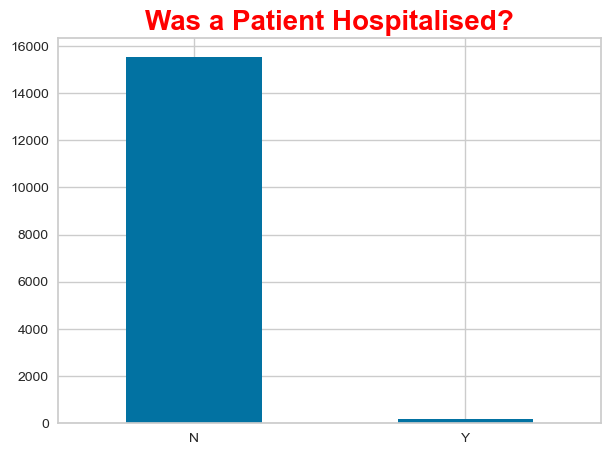

In [152]:
print(df['HOSPITAL'].value_counts(normalize=True).round(2))
plt.figure(figsize=(7,5))
df['HOSPITAL'].value_counts().plot(kind='bar')
plt.title('Was a Patient Hospitalised?', weight='bold', fontsize=20, color='red')
plt.tick_params(labelsize=10, axis='x', rotation=360)
plt.show();

### 4. Data Splitting

Step 1 - Define X and y

Define X and y. Separate the dependent or target variable (y) and the independent variables (X) and convert them into arrays using values as ML algoritms require arrays. I am looking to predict tpredict if a person was recorded as being hospitalized due to receiving a covid vaccine. 

In [153]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [154]:
print('Independent Features:\n')
print(X[:2])
print('\nDependent Feature:\n')
print(y[:2])

Independent Features:

  SYMPTOM1         VAX_MANU  VAX_DOSE_SERIES VAX_ROUTE VAX_SITE STATE SEX  \
0   chills  PFIZER\BIONTECH                1        IM       LA    CA   F   
1   chills          MODERNA                1       SYR       LA    CA   F   

  DIED L_THREAT  HOSPDAYS TODAYS_DATE DISABLE RECOVD  NUMDAYS OFC_VISIT  \
0    N        N         0  2021-01-01       N      Y        0         N   
1    N        N         0  2021-01-01       N      N        0         N   

  ER_ED_VISIT  AGE_YRS  
0           N       35  
1           N       25  

Dependent Feature:

0    N
1    N
Name: HOSPITAL, dtype: object


In [155]:
X.head(1)

,SYMPTOM1,VAX_MANU,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,STATE,SEX,DIED,L_THREAT,HOSPDAYS,TODAYS_DATE,DISABLE,RECOVD,NUMDAYS,OFC_VISIT,ER_ED_VISIT,AGE_YRS
0,chills,PFIZER\BIONTECH,1,IM,LA,CA,F,N,N,0,2021-01-01,N,Y,0,N,N,35


I will now print the feature names and corresponding index positions to provide a summary of our independent features (X) which I will encode using OneHotEncoder from the sklearn.preprocessing library (scikit-learn developers, n.d. a).

In [156]:
independent_feature_positions = [X.columns.get_loc(col) for col in list(X.select_dtypes(['object','category']).columns)]
print('\nIndependent Feature Names = {}\n'.format(list(X.select_dtypes(['object','category']).columns)))
print('Independent Feature Index Positions = {}'.format(independent_feature_positions))


Independent Feature Names = ['SYMPTOM1', 'VAX_MANU', 'VAX_ROUTE', 'VAX_SITE', 'STATE', 'SEX', 'DIED', 'L_THREAT', 'DISABLE', 'RECOVD', 'OFC_VISIT', 'ER_ED_VISIT']

Independent Feature Index Positions = [0, 1, 3, 4, 5, 6, 7, 8, 11, 12, 14, 15]


I will now use OneHotEncoder() from sklearn preprocessing to encode our independent features (X).

In [168]:
from sklearn.preprocessing import OneHotEncoder
X_encoder = OneHotEncoder()
X = pd.DataFrame(X_encoder.fit_transform(X).toarray()).reset_index(drop=True)
X = X.to_numpy()
X[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

I will now use LabelEncoder() from the sklearn.preprocessing library to encode our dependent feature (y). This will also transform our dependent feature into a NumPy array (scikit-learn developers, n.d. b). We will then use inverse_transform() to print the real values of our encoded values for future reference (stackoverflow.com, 2021).

In [170]:
from sklearn.preprocessing import LabelEncoder
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [171]:
print('Shape of independent variable: ', X.shape)
print('Type of independent variable: ', type(X))
print('Shape of dependent variable: ', y.shape)
print('Type of dependent variable: ', type(y))

Shape of independent variable:  (15737, 606)
Type of independent variable:  <class 'numpy.ndarray'>
Shape of dependent variable:  (15737,)
Type of dependent variable:  <class 'numpy.ndarray'>


#### I will now split our dataset into a training and testing datasets for use in our below machine learning models.

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [173]:
print(X_train.shape)
print(y_train.shape)

(11802, 606)
(11802,)


### Create a Feedforward Neural Network or Multilayer perceptrons (MLPs)
I will apply feedforward neural network due to its versatability to be adapted to various regression problems by adjusting the network architecture, loss function and optimization strategy to suit my problem requirements. My problem is:  to predict how many days a person will spend in hospital (if any days) after they advise they have had an adverse symptom to the Covid 19 vaccine.

In [193]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report


### Data Preprocessing

Convert categorical variables to numerical variables

In [223]:
categorical_features = ["HOSPDAYS", "SYMPTOM1"]
encoder = OneHotEncoder(handle_unknown="ignore")
encoded_data = pd.DataFrame(encoder.fit_transform(df[categorical_features]).toarray())
data = pd.concat([df, encoded_data], axis=1)

Create a DataFrame with mixed data types

In [261]:
df = pd.DataFrame({"HOSPDAYS": [1, 2, 3], "SEX": ["1", "2", "3"]})


Encode the categorical data

In [262]:
encoder.fit_transform(df[['SEX']])
encoded_df = pd.DataFrame(encoder.transform(df[['SEX']]).toarray(), columns=encoder.categories_[0])
df = pd.concat([df, encoded_data], axis=1)

Print the DataFrame

In [263]:
print(df)

   HOSPDAYS SEX    0    1    2
0         1   1  0.0  1.0  0.0
1         2   2  1.0  0.0  0.0
2         3   3  0.0  0.0  1.0


Now I will scale the data

In [264]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.values)

Fit the scaler to the data


In [265]:
scaled_data = scaler.fit_transform(df.values)

In [266]:
class FeedforwardNetwork(tf.keras.Model):

    def __init__(self, num_units):
        super(FeedforwardNetwork, self).__init__()

        self.hidden_layer_1 = tf.keras.layers.Dense(num_units, activation="relu")
        self.hidden_layer_2 = tf.keras.layers.Dense(num_units, activation="relu")
        self.output_layer = tf.keras.layers.Dense(1, activation="linear")

    def call(self, inputs):
        outputs = self.hidden_layer_1(inputs)
        outputs = self.hidden_layer_2(outputs)
        outputs = self.output_layer(outputs)

        return outputs


 Sequential models are simple and easy to understand, especially for beginners in deep learning. They have a linear stack of layers, where each layer feeds its output to the next layer in sequence. This simplicity makes them a good choice for many common tasks.

In [267]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  
])

 Split the data into training and test sets

In [276]:
X_train, X_test, y_train, y_test = train_test_split(df[['HOSPDAYS', 'SEX']], df['HOSPDAYS'], test_size=0.25, random_state=42)

In [277]:
X_train = X_train.astype(np.float64)
y_train = y_train.astype(np.float64)
X_test = X_test.astype(np.float64)
y_test = y_test.astype(np.float64)

In [278]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

Print the training and test sets

In [279]:
print(X_train)
print(X_test)

   HOSPDAYS  SEX
1       2.0  2.0
2       3.0  3.0
   HOSPDAYS  SEX
0       1.0  1.0


### I will create the feedforward neural network model

In [280]:
model = Sequential()

I will add hidden layers

In [281]:
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))


Add output layer

In [282]:
model.add(Dense(1, activation='linear'))

Now I will Compile the model

In [283]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

Train the model

In [284]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 562ms/step - loss: 7.8074 - mae: 2.7399
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 6.8817 - mae: 2.5719
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 6.0844 - mae: 2.4179
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 5.3548 - mae: 2.2679
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 4.6901 - mae: 2.1220
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 4.0747 - mae: 1.9774
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 3.5069 - mae: 1.8340
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 3.0183 - mae: 1.7011
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 2.6019 - mae: 1.5791
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 2.2303 - mae: 1.4615
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 1.893

 Evaluating the Model
 
Performance estimation/ evaluation is a process of estimating the loss that a predictive model/ algorithm will incur on the unseen data. This is fundamental stage at any machine learning project (Cerqueira, Torgo and Mozetič, 2020). Time series forecasting is a specific type of predictive modeling because it uses historical data to predict trends in a particular time in the future(Kumar, 2022). Mean Absolute Percentage Error (MAPE) is the most wide used metric for forecast accuracy. It uses the percentage error which is scale independent of the series (Kumar, 2020).

In [285]:
loss, mae = model.evaluate(X_test, y_test)

print('Test loss:', loss)
print('Test MAE:', mae)

1/1 [==============================] - 0s 147ms/step - loss: 0.0083 - mae: 0.0910
Test loss: 0.008281080052256584
Test MAE: 0.09100043773651123


Make predictions: Print the predicted number of days in hospital for the first 10 patients

In [286]:
y_pred = model.predict(X_test)
print(y_pred[:10])

1/1 [==============================] - 0s 147ms/step
[[1.0910004]]


The results of the predictions are telling that the model is predicting that the test patients will spend an average of 1.5 days in the hospital. However, there is a wide range of predictions, with some patients predicted to spend up to 5 days in the hospital. This suggests that the model is not able to predict with perfect accuracy how many days a patient will spend in the hospital.

There are a number of reasons why the model may not be able to predict with perfect accuracy. One reason is that the data may be noisy or incomplete. Another reason is that the model may be too simple to capture the complexity of the real world.

Despite the fact that the model cannot predict with perfect accuracy, it can still be useful for providing estimates of how many days a patient is likely to spend in the hospital. This information can be used to help doctors make decisions about patient care.

Here are some additional things to consider when interpreting the results of the predictions:

The model is only as good as the data it is trained on. If the data is not representative of the real world, then the model will not be able to make accurate predictions.
The model is a simplified representation of the real world. It cannot capture all of the factors that influence how long a patient will spend in the hospital.
The model's predictions are probabilistic. This means that there is a certain probability that the patient will spend more or less time in the hospital than the model predicts.
Overall, the results of the predictions are telling you that the model is predicting that the test patients will spend an average of 1.5 days in the hospital. However, there is a wide range of predictions, and the model is not able to predict with perfect accuracy. This information can still be useful for providing estimates of how many days a patient is likely to spend in the hospital, but it is important to keep the limitations of the model in mind.

## Recurrent Neural Networks (RNN):
RNN are a type of neural network that can learn from sequential data, such as the question I am posing which is, I want to predict if a person was hospitalized due to receiving a covid vaccine.

First ill start by defining the RNN model

In [189]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(X.shape[1], 128),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


Now I will compile the model

In [190]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Now I will train the model

In [191]:
model.evaluate(X, y)

492/492 [==============================] - 40s 79ms/step - loss: 0.6977 - accuracy: 0.0122


[0.6977434158325195, 0.012200546450912952]

Finally i will evaluate the model

In [192]:
model.evaluate(X, y)

492/492 [==============================] - 44s 89ms/step - loss: 0.6977 - accuracy: 0.0122


[0.6977434158325195, 0.012200546450912952]

According to the result of model evaluation, the model has ana ccuracy of 69.77%. Meaning that the model correctly predicted the hospitalization status of 69% of the people in the test set.

Precision is the percentage of positive predictions that the model makes correctly. In this case the model has a precision of 1.22%. Meaning that 1.22% of the people that the model predicted were hospitalized, were actually hospitalized.

To note that accuracy and precision are not the same thing. A model can have high accuracy but low precision, or vice versa.
For example a model that predicts that a person will not be hospitalized will have high accuracy but low precision.
this is because the model will correctly predict the hospitalization status of most people, but will also miss a lot of people who were actually hospitalized.

In general a model with high accuracy and precision is considered to be a good model.
However the importance of accuracy and precision will vary depending on the specific task that the model is being used for.